In [1]:
cd motoki/PycharmProjects/motoki_ul/review_analysis

[Errno 2] No such file or directory: 'motoki/PycharmProjects/motoki_ul/review_analysis'
/Users/motoki/PycharmProjects/motoki_ul/review_analysis


In [3]:
##Clean raw data & prepare for analytics

import pandas as pd

input_dir = "/Users/motoki/PycharmProjects/motoki_ul/review_analysis/input_dir/amazon"
df = pd.read_csv(f"{input_dir}/20230906_review_sum.csv")
df.fillna("。")

#category = "BlackTea"
#flavor = "EarlGray"
#decaf = "DeCaf"
#asin = "B01C28Z16U"
brand = "Pukka"

df.rename(columns={"product": "product_name"}, inplace=True)

#Found NaN in title columns so replaced
#df["comment"] = str(df["comment"])
df["title"] = df["title"].fillna("。")
df["combined_title"] = df["title"].str.cat(df["comment"].fillna("。"), sep=' ')

#df_new_raw = pd.concat([df["ASIN"], df["product_name"], df["brand"], df["combined_title"], df["Category"], df["Flavor"], df["DeCaf"]], axis=1)
#df_new_raw = pd.concat([df["ASIN"], df["product_name"], df["brand"], df["combined_title"]], axis=1)
df_new_raw = pd.concat([df["product_name"], df["brand"], df["combined_title"]], axis=1)


df_new = df_new_raw.fillna(0)
#df_new = df_new[df_new["Category"].str.contains(category, na=False)]
#df_new = df_new[df_new["Flavor"].str.contains(flavor)]
#df_new = df_new[df_new["brand"].str.contains(brand, na=False)]
#df_new = df_new[df_new["product_name"].str.contains("リプトン カフェインレスティー")]
#df_new = df_new[~df_new["sub-category"].str.contains(sub_category_excl)]
#print(df_new)
df_new.info()

#Combine comments on each product (for Doc2Vec)
#df_new_combined = df_new[~df_new.duplicated(subset='product_name')].reset_index()
df_new_combined = df_new.groupby(["product_name", "brand"])["combined_title"].sum().reset_index()
#df_new_combined = df_new.groupby(["product_name", "brand"])["combined_title"].sum().reset_index()

df_new_combined.product

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_name    1680 non-null   object
 1   brand           1680 non-null   object
 2   combined_title  1680 non-null   object
dtypes: object(3)
memory usage: 39.5+ KB


<bound method DataFrame.prod of                                          product_name                 brand  \
0   AGF ブレンディ カフェラトリー スティック 芳醇ピーチティー 7本×6箱 【 フルーツテ...           AGF(エージーエフ)   
1                     AGF プロフェッショナル アップルティー1L用 10本 粉末           AGF(エージーエフ)   
2                      AGF プロフェッショナル ピーチティー1L用 10本 粉末           AGF(エージーエフ)   
3   AHMAD TEA ( アーマッドティー ) フルーツセレクション ティーバッグ 20袋 ×...  AHMAD TEA (アーマッドティー)   
4   DozoFreesh フルーツティー ウーロン茶 ドライフルーツティー 7種のドライフルーツ...           dozo freesh   
5            DozoFreesh フルーツティー 砂糖不使用 カロリーゼロ (全4種セット)           dozo freesh   
6                            ESSERRE イタリアン ピーチティ 500g        Esserre(エッセーレ)   
7                    Janat プロヴァンスシリーズ フルーツティーアソート 40P         Janat(ジャンナッツ)   
8     amsu tea (アムシュティー) フレーバーティー ベルガモットピーチ ティーバッグ15袋              amsu tea   
9           amsu tea (アムシュティー) フレーバーティー ライチ ティーバッグ15袋              amsu tea   
10       【Amazon.co.jp限定】リプトン紅茶 フレーバーティー アソート 個包装 60袋                  リプトン   
11  【セット商品】 AHMAD TE

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/motoki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['よい', '香り', '職場', 'いただい', '簡単', '味', '香り', 'いい', '喜ば', 'いい', '手軽', '美味しかっ', '溶ける', '手軽', '作れ', '使い勝手', '良かっ', 'スーパー', 'スティック', '無かっ', 'amazon', '購入', '美味しい', '出し', 'お客様', '皆様', '美味しい', '', 'ください', '大事', '褒め', 'いただき', '差し上げ', '購入', 'スーパー', '売っ', '助かり', '送料', '込み', '感激', '❣', '濃厚', '美味しい', 'apple', 'コク', 'あっ', '濃厚', '美味しい', '', 'ice', 'ホット', '両方', '行け', '', 'なる', '味', 'ー', '', '人気', 'お客様', '大変', '美味しい', '好評', '美味しい', '近所', '買っ', '売っ', 'なくなっ', 'ゼロ', 'なっ', 'しまい', '疲れ', '甘', 'いい', '匂い', 'テンション', 'あがる', '定期', '便', 'amazon', '無くなり', '使い勝手', 'よい', '気に入っ', 'アイス', 'ホット', '良い', '入り', '難い', '助かり', '風味', '甘味', '味', 'スーパー', '販売', 'なく', 'amazon', '購入', '似', '物', '売ら', 'メーカー', '一番', '美味しい', '味', '香り', '好き', '寒い', '飲む', '暖かい', '杯', 'する', '味', '香り', 'お気に入り', '果糖', '砂糖', '入っ', '杯', '', 'kcal', '嬉しい', '仕事', '飲み', '香り', '凄く', '良い', 'アマゾン', '種類', 'ピーチ', 'ティー', '購入', '致し', '一番', '香り', '味', '良く', '感動', 'リピ', '☺', 'リピート', 'おいしい', '味', '甘', 'すぎ', '飲み', 'やすく', '後味', '良く', '購入', '売っ', '助かり', '美味しい', '美味しい', '頂い

香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
溶ける	動詞,自立,*,*,一段,基本形,溶ける,トケル,トケル
アイス	名詞,一般,*,*,*,*,アイス,アイス,アイス
いただく	動詞,自立,*,*,五段・カ行イ音便,基本形,いただく,イタダク,イタダク
甘み	名詞,一般,*,*,*,*,甘み,アマミ,アマミ
おいしい	形容詞,自立,*,*,形容詞・イ段,基本形,おいしい,オイシイ,オイシイ
スーパー	名詞,一般,*,*,*,*,スーパー,スーパー,スーパー
３	名詞,数,*,*,*,*,３,サン,サン
３	名詞,数,*,*,*,*,３,サン,サン
６	名詞,数,*,*,*,*,６,ロク,ロク
抜き	名詞,一般,*,*,*,*,抜き,ヌキ,ヌキ
売っ	動詞,自立,*,*,五段・ラ行,連用タ接続,売る,ウッ,ウッ
定期	名詞,一般,*,*,*,*,定期,テイキ,テイキ
便	名詞,接尾,一般,*,*,*,便,ビン,ビン
高い	形容詞,自立,*,*,形容詞・アウオ段,基本形,高い,タカイ,タカイ
キャンセル	名詞,サ変接続,*,*,*,*,キャンセル,キャンセル,キャンセル
スーパー	名詞,一般,*,*,*,*,スーパー,スーパー,スーパー
購入	名詞,サ変接続,*,*,*,*,購入,コウニュウ,コーニュー
喉	名詞,一般,*,*,*,*,喉,ノド,ノド
痛く	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,痛い,イタク,イタク
なる	動詞,自立,*,*,五段・ラ行,基本形,なる,ナル,ナル
味	名詞,一般,*,*,*,*,味,アジ,アジ
おいしい	形容詞,自立,*,*,形容詞・イ段,基本形,おいしい,オイシイ,オイシイ
飲ん	動詞,自立,*,*,五段・マ行,連用タ接続,飲む,ノン,ノン
喉	名詞,一般,*,*,*,*,喉,ノド,ノド
痛く	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,痛い,イタク,イタク
なる	動詞,自立,*,*,五段・ラ行,基本形,なる,ナル,ナル
捨て	動詞,自立,*,*,一段,連用形,捨てる,ステ,ステ
喉	名詞,一般,*,*,*,*,喉,ノド,ノド
弱い	形容詞,自立,*,*,形容詞・アウオ段,基本形,弱い,ヨワイ,ヨワイ
注意	名詞,サ変接続,*,*,*,*,注意,チュウイ,チューイ
商品	名詞,一般,*,*,*,*,商

嬉しい	形容詞,自立,*,*,形容詞・イ段,基本形,嬉しい,ウレシイ,ウレシイ
中国	名詞,固有名詞,地域,一般,*,*,中国,チュウゴク,チューゴク
産	名詞,接尾,地域,*,*,*,産,サン,サン
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
見た目	名詞,一般,*,*,*,*,見た目,ミタメ,ミタメ
かわいく	形容詞,自立,*,*,形容詞・イ段,連用テ接続,かわいい,カワイク,カワイク
いい	動詞,自立,*,*,五段・ワ行促音便,連用形,いう,イイ,イイ
飲み	動詞,自立,*,*,五段・マ行,連用形,飲む,ノミ,ノミ
続ける	動詞,非自立,*,*,一段,基本形,続ける,ツヅケル,ツズケル
高い	形容詞,自立,*,*,形容詞・アウオ段,基本形,高い,タカイ,タカイ
ギフト	名詞,サ変接続,*,*,*,*,ギフト,ギフト,ギフト
最適	名詞,一般,*,*,*,*,最適,サイテキ,サイテキ
instagram	名詞,一般,*,*,*,*,*
紹介	名詞,サ変接続,*,*,*,*,紹介,ショウカイ,ショーカイ
試し	名詞,一般,*,*,*,*,試し,タメシ,タメシ
種類	名詞,一般,*,*,*,*,種類,シュルイ,シュルイ
購入	名詞,サ変接続,*,*,*,*,購入,コウニュウ,コーニュー
み	動詞,自立,*,*,一段,連用形,みる,ミ,ミ
合い	動詞,非自立,*,*,五段・ワ行促音便,連用形,合う,アイ,アイ
ドラゴン	名詞,一般,*,*,*,*,ドラゴン,ドラゴン,ドラゴン
フルーツ	名詞,一般,*,*,*,*,フルーツ,フルーツ,フルーツ
歯	名詞,一般,*,*,*,*,歯,ハ,ハ
残し	動詞,自立,*,*,五段・サ行,連用形,残す,ノコシ,ノコシ
チェック	名詞,サ変接続,*,*,*,*,チェック,チェック,チェック
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
シロップ	名詞,一般,*,*,*,*,シロップ,シロップ,シロップ
味	名詞,接尾,一般,*,*,*,味,ミ,ミ
ピーチ	名詞,一般,*,*,*,*,ピーチ,ピーチ,ピーチ
ウーロン茶	名詞,一般,*,*,*,*,ウーロン茶,ウーロンチャ,ウーロンチャ
使用	名詞,サ変接続,*,*,*,*,使用,シヨウ,シヨー
ドライ	名詞,一般,*,*,*,*

食べ	動詞,自立,*,*,一段,連用形,食べる,タベ,タベ
感覚	名詞,一般,*,*,*,*,感覚,カンカク,カンカク
満たさ	動詞,自立,*,*,五段・サ行,未然形,満たす,ミタサ,ミタサ
♪	名詞,サ変接続,*,*,*,*,*
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
強い	形容詞,自立,*,*,形容詞・アウオ段,基本形,強い,ツヨイ,ツヨイ
コスパ	名詞,一般,*,*,*,*,*
良く	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,良い,ヨク,ヨク
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
強い	形容詞,自立,*,*,形容詞・アウオ段,基本形,強い,ツヨイ,ツヨイ
ガブガブ	名詞,一般,*,*,*,*,*
飲む	動詞,自立,*,*,五段・マ行,基本形,飲む,ノム,ノム
最適	名詞,一般,*,*,*,*,最適,サイテキ,サイテキ
香料	名詞,一般,*,*,*,*,香料,コウリョウ,コーリョー
匂い	名詞,一般,*,*,*,*,匂い,ニオイ,ニオイ
強い	形容詞,自立,*,*,形容詞・アウオ段,基本形,強い,ツヨイ,ツヨイ
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
好み	名詞,一般,*,*,*,*,好み,コノミ,コノミ
差	名詞,接尾,一般,*,*,*,差,サ,サ
激しく	形容詞,自立,*,*,形容詞・イ段,連用テ接続,激しい,ハゲシク,ハゲシク
なる	動詞,自立,*,*,五段・ラ行,基本形,なる,ナル,ナル
思い	名詞,一般,*,*,*,*,思い,オモイ,オモイ
個人	名詞,一般,*,*,*,*,個人,コジン,コジン
ストロベリー	名詞,一般,*,*,*,*,ストロベリー,ストロベリー,ストロベリー
アップル	名詞,一般,*,*,*,*,アップル,アップル,アップル
飲み	動詞,自立,*,*,五段・マ行,連用形,飲む,ノミ,ノミ
やすい	形容詞,非自立,*,*,形容詞・アウオ段,基本形,やすい,ヤスイ,ヤスイ
冷え	名詞,一般,*,*,*,*,冷え,ヒエ,ヒエ
ミルク	名詞,一般,*,*,*,*,ミルク,ミルク,ミルク
ティー	名詞,一般,*,*,*,*,ティー,ティー,ティー
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,

ストロベリー	名詞,一般,*,*,*,*,ストロベリー,ストロベリー,ストロベリー
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
強い	形容詞,自立,*,*,形容詞・アウオ段,基本形,強い,ツヨイ,ツヨイ
綺麗	名詞,形容動詞語幹,*,*,*,*,綺麗,キレイ,キレイ
赤	名詞,一般,*,*,*,*,赤,アカ,アカ
紅茶	名詞,一般,*,*,*,*,紅茶,コウチャ,コーチャ
色	名詞,接尾,一般,*,*,*,色,ショク,ショク
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
love	名詞,一般,*,*,*,*,*
love	名詞,一般,*,*,*,*,*
taste	名詞,一般,*,*,*,*,*
smell	名詞,一般,*,*,*,*,*
good	名詞,一般,*,*,*,*,*
レモン	名詞,一般,*,*,*,*,レモン,レモン,レモン
ライム	名詞,一般,*,*,*,*,ライム,ライム,ライム
いっ	動詞,自立,*,*,五段・カ行促音便,連用タ接続,いく,イッ,イッ
手軽	名詞,形容動詞語幹,*,*,*,*,手軽,テガル,テガル
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
アーマッド	名詞,一般,*,*,*,*,*
レモン	名詞,一般,*,*,*,*,レモン,レモン,レモン
ライム	名詞,一般,*,*,*,*,ライム,ライム,ライム
我が家	名詞,一般,*,*,*,*,我が家,ワガヤ,ワガヤ
フレーバー	名詞,一般,*,*,*,*,フレーバー,フレーバー,フレーバー
ティー	名詞,一般,*,*,*,*,ティー,ティー,ティー
ストック	名詞,サ変接続,*,*,*,*,ストック,ストック,ストック
択	名詞,一般,*,*,*,*,*
なっ	動詞,自立,*,*,五段・ラ行,連用タ接続,なる,ナッ,ナッ
い	動詞,非自立,*,*,一段,未然形,いる,イ,イ
え	フィラー,*,*,*,*,*,え,エ,エ
試し	名詞,一般,*,*,*,*,試し,タメシ,タメシ
有名	名詞,形容動詞語幹,*,*,*,*,有名,ユウメイ,ユーメイ
茶	名詞,一般,*,*,*,*,茶,チャ,チャ
葉	名詞,一般,*,*,*,*,葉,ハ,ハ
淹	名詞,一般,*,*,*,*,*
れる	動詞,接尾,*,*,一段

頂い	動詞,自立,*,*,五段・カ行イ音便,連用タ接続,頂く,イタダイ,イタダイ
おり	動詞,非自立,*,*,五段・ラ行,連用形,おる,オリ,オリ
注意	名詞,サ変接続,*,*,*,*,注意,チュウイ,チューイ
普段	名詞,副詞可能,*,*,*,*,普段,フダン,フダン
オリゴ	名詞,一般,*,*,*,*,*
糖	名詞,接尾,一般,*,*,*,糖,トウ,トー
思っ	動詞,自立,*,*,五段・ワ行促音便,連用タ接続,思う,オモッ,オモッ
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
紅茶	名詞,一般,*,*,*,*,紅茶,コウチャ,コーチャ
飲み	動詞,自立,*,*,五段・マ行,連用形,飲む,ノミ,ノミ
オリゴ	名詞,一般,*,*,*,*,*
糖	名詞,接尾,一般,*,*,*,糖,トウ,トー
一緒	名詞,サ変接続,*,*,*,*,一緒,イッショ,イッショ
れる	動詞,接尾,*,*,一段,基本形,れる,レル,レル
良い	形容詞,自立,*,*,形容詞・アウオ段,基本形,良い,ヨイ,ヨイ
通じ	名詞,一般,*,*,*,*,通じ,ツウジ,ツージ
あり	動詞,自立,*,*,五段・ラ行,連用形,ある,アリ,アリ
甘	形容詞,自立,*,*,形容詞・アウオ段,ガル接続,甘い,アマ,アマ
あり	助動詞,*,*,*,五段・ラ行アル,連用形,ある,アリ,アリ
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
アップル	名詞,一般,*,*,*,*,アップル,アップル,アップル
ティー	名詞,一般,*,*,*,*,ティー,ティー,ティー
ドラッグストア	名詞,一般,*,*,*,*,ドラッグストア,ドラッグストア,ドラッグストア
見かけ	名詞,一般,*,*,*,*,見かけ,ミカケ,ミカケ
お腹	名詞,一般,*,*,*,*,お腹,オナカ,オナカ
弱い	形容詞,自立,*,*,形容詞・アウオ段,基本形,弱い,ヨワイ,ヨワイ
試し	名詞,一般,*,*,*,*,試し,タメシ,タメシ
１	名詞,数,*,*,*,*,１,イチ,イチ
本	名詞,接尾,助数詞,*,*,*,本,ホン,ホン
購入	名詞,サ変接続,*,*,*,*,購入,コウニュウ,コーニュー
紅茶	名詞,一般,*,*,*,*,紅茶,コウチャ,コーチャ
好き	名詞,形容動詞語幹,*,

飲ん	動詞,自立,*,*,五段・マ行,連用タ接続,飲む,ノン,ノン
ある	連体詞,*,*,*,*,*,ある,アル,アル
いい	形容詞,自立,*,*,形容詞・イイ,基本形,いい,イイ,イイ
次回	名詞,副詞可能,*,*,*,*,次回,ジカイ,ジカイ
違う	動詞,自立,*,*,五段・ワ行促音便,基本形,違う,チガウ,チガウ
グレープ	名詞,一般,*,*,*,*,グレープ,グレープ,グレープ
届い	動詞,自立,*,*,五段・カ行イ音便,連用タ接続,届く,トドイ,トドイ
味	名詞,一般,*,*,*,*,味,アジ,アジ
パケ	名詞,一般,*,*,*,*,*
違う	動詞,自立,*,*,五段・ワ行促音便,基本形,違う,チガウ,チガウ
変更	名詞,サ変接続,*,*,*,*,変更,ヘンコウ,ヘンコー
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
写真	名詞,一般,*,*,*,*,写真,シャシン,シャシン
変え	動詞,自立,*,*,一段,連用形,変える,カエ,カエ
書い	動詞,自立,*,*,五段・カ行イ音便,連用タ接続,書く,カイ,カイ
ください	動詞,非自立,*,*,五段・ラ行特殊,命令ｉ,くださる,クダサイ,クダサイ
リピート	名詞,一般,*,*,*,*,*
爽やか	名詞,形容動詞語幹,*,*,*,*,爽やか,サワヤカ,サワヤカ
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
良く	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,良い,ヨク,ヨク
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
甘	形容詞,自立,*,*,形容詞・アウオ段,ガル接続,甘い,アマ,アマ
控えめ	名詞,形容動詞語幹,*,*,*,*,控えめ,ヒカエメ,ヒカエメ
ベスト	名詞,一般,*,*,*,*,ベスト,ベスト,ベスト
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
別物	名詞,一般,*,*,*,*,別物,ベツモノ,ベツモノ
飲ん	動詞,自立,*,*,五段・マ行,連用タ接続,飲む,ノン,ノン
いる	動詞,非自立,*,*,一段,基本形,いる,イル,イル
まとめ買い	名詞,一般,*,*,*,*,まとめ買い,マトメガイ,マトメガイ
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ

ティー	名詞,一般,*,*,*,*,ティー,ティー,ティー
気に入っ	動詞,自立,*,*,五段・ラ行,連用タ接続,気に入る,キニイッ,キニイッ
飲ん	動詞,自立,*,*,五段・マ行,連用タ接続,飲む,ノン,ノン
季節	名詞,一般,*,*,*,*,季節,キセツ,キセツ
終わり	動詞,自立,*,*,五段・ラ行,連用形,終わる,オワリ,オワリ
販売	名詞,サ変接続,*,*,*,*,販売,ハンバイ,ハンバイ
なくなっ	動詞,自立,*,*,五段・ラ行,連用タ接続,なくなる,ナクナッ,ナクナッ
しまっ	動詞,非自立,*,*,五段・ワ行促音便,連用タ接続,しまう,シマッ,シマッ
購入	名詞,サ変接続,*,*,*,*,購入,コウニュウ,コーニュー
マスカット	名詞,一般,*,*,*,*,マスカット,マスカット,マスカット
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
強め	動詞,自立,*,*,一段,連用形,強める,ツヨメ,ツヨメ
ほのか	名詞,一般,*,*,*,*,ほのか,ホノカ,ホノカ
桃	名詞,一般,*,*,*,*,桃,モモ,モモ
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
甘かっ	形容詞,自立,*,*,形容詞・アウオ段,連用タ接続,甘い,ウマカッ,ウマカッ
ゴクゴク	名詞,一般,*,*,*,*,*
飲む	動詞,自立,*,*,五段・マ行,基本形,飲む,ノム,ノム
甘く	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,甘い,アマク,アマク
糖	名詞,一般,*,*,*,*,糖,トウ,トー
紅茶	名詞,一般,*,*,*,*,紅茶,コウチャ,コーチャ
割っ	動詞,自立,*,*,五段・ラ行,連用タ接続,割る,ワッ,ワッ
飲ん	動詞,自立,*,*,五段・マ行,連用タ接続,飲む,ノン,ノン
糖	名詞,一般,*,*,*,*,糖,トウ,トー
出る	動詞,自立,*,*,一段,基本形,出る,デル,デル
良い	形容詞,自立,*,*,形容詞・アウオ段,基本形,良い,ヨイ,ヨイ
思い	名詞,一般,*,*,*,*,思い,オモイ,オモイ
商品	名詞,一般,*,*,*,*,商品,ショウヒン,ショーヒン
違う	動詞,自立,*,*,五段・ワ行促音便,基本形,違う,チガウ,チガウ
クラフト	名詞,一般,*,*,*,*,クラフト,クラフト,クラフト
ボス	名詞,一般

商品	名詞,一般,*,*,*,*,商品,ショウヒン,ショーヒン
少量	名詞,副詞可能,*,*,*,*,少量,ショウリョウ,ショーリョー
高い	形容詞,自立,*,*,形容詞・アウオ段,基本形,高い,タカイ,タカイ
量	名詞,一般,*,*,*,*,量,リョウ,リョー
たっぷり	名詞,一般,*,*,*,*,たっぷり,タップリ,タップリ
美味しく	形容詞,自立,*,*,形容詞・イ段,連用テ接続,美味しい,オイシク,オイシク
いただき	名詞,一般,*,*,*,*,いただき,イタダキ,イタダキ
普段	名詞,副詞可能,*,*,*,*,普段,フダン,フダン
購入	名詞,サ変接続,*,*,*,*,購入,コウニュウ,コーニュー
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
美味しく	形容詞,自立,*,*,形容詞・イ段,連用テ接続,美味しい,オイシク,オイシク
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
癒さ	動詞,自立,*,*,五段・サ行,未然形,癒す,イヤサ,イヤサ
れる	動詞,接尾,*,*,一段,基本形,れる,レル,レル
フルーツ	名詞,一般,*,*,*,*,フルーツ,フルーツ,フルーツ
ティー	名詞,一般,*,*,*,*,ティー,ティー,ティー
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
よく	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,よい,ヨク,ヨク
味	名詞,一般,*,*,*,*,味,アジ,アジ
甘	形容詞,自立,*,*,形容詞・アウオ段,ガル接続,甘い,アマ,アマ
め	名詞,接尾,一般,*,*,*,め,メ,メ
お気に入り	名詞,一般,*,*,*,*,お気に入り,オキニイリ,オキニイリ
少ない	形容詞,自立,*,*,形容詞・アウオ段,基本形,少ない,スクナイ,スクナイ
入っ	動詞,自立,*,*,五段・ラ行,連用タ接続,入る,ハイッ,ハイッ
いる	動詞,非自立,*,*,一段,基本形,いる,イル,イル
見え	名詞,一般,*,*,*,*,見え,ミエ,ミエ
封	名詞,一般,*,*,*,*,封,フウ,フー
開ける	動詞,自立,*,*,一段,基本形,開ける,アケル,アケル
空気	名詞,一般,*,*,*,*,空気,クウキ,クーキ
入り	

すぎ	名詞,接尾,副詞可能,*,*,*,すぎ,スギ,スギ
休み	名詞,一般,*,*,*,*,休み,ヤスミ,ヤスミ
コーヒー	名詞,一般,*,*,*,*,コーヒー,コーヒー,コーヒー
タイム	名詞,一般,*,*,*,*,タイム,タイム,タイム
くつろぎ	動詞,自立,*,*,五段・ガ行,連用形,くつろぐ,クツロギ,クツロギ
会社	名詞,一般,*,*,*,*,会社,カイシャ,カイシャ
休み	名詞,一般,*,*,*,*,休み,ヤスミ,ヤスミ
我が家	名詞,一般,*,*,*,*,我が家,ワガヤ,ワガヤ
コーヒー	名詞,一般,*,*,*,*,コーヒー,コーヒー,コーヒー
タイム	名詞,一般,*,*,*,*,タイム,タイム,タイム
菓子	名詞,一般,*,*,*,*,菓子,カシ,カシ
食べ	動詞,自立,*,*,一段,連用形,食べる,タベ,タベ
紅茶	名詞,一般,*,*,*,*,紅茶,コウチャ,コーチャ
くつろぎ	動詞,自立,*,*,五段・ガ行,連用形,くつろぐ,クツロギ,クツロギ
ひと	名詞,数,*,*,*,*,ひと,ヒト,ヒト
時	名詞,接尾,助数詞,*,*,*,時,ジ,ジ
楽しみ	名詞,一般,*,*,*,*,楽しみ,タノシミ,タノシミ
オススメ	名詞,サ変接続,*,*,*,*,オススメ,オススメ,オススメ
分かり	動詞,自立,*,*,五段・ラ行,連用形,分かる,ワカリ,ワカリ
やすい	形容詞,非自立,*,*,形容詞・アウオ段,基本形,やすい,ヤスイ,ヤスイ
美味し	形容詞,自立,*,*,形容詞・イ段,ガル接続,美味しい,オイシ,オイシ
美味しく	形容詞,自立,*,*,形容詞・イ段,連用テ接続,美味しい,オイシク,オイシク
飲める	動詞,自立,*,*,一段,基本形,飲める,ノメル,ノメル
思い	名詞,一般,*,*,*,*,思い,オモイ,オモイ
ハーブ	名詞,一般,*,*,*,*,ハーブ,ハーブ,ハーブ
ティー	名詞,一般,*,*,*,*,ティー,ティー,ティー
好き	名詞,形容動詞語幹,*,*,*,*,好き,スキ,スキ
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
ハーブ	名詞,一般,*,*,*,*,ハーブ,ハーブ,ハーブ
ティー	名詞,一般,*,*,*,*,ティー,ティー,ティー
選び	名詞,一般,*,*,*,*,選び,エラビ,エラビ
リプ

ティー	名詞,一般,*,*,*,*,ティー,ティー,ティー
甘	形容詞,自立,*,*,形容詞・アウオ段,ガル接続,甘い,アマ,アマ
紅茶	名詞,一般,*,*,*,*,紅茶,コウチャ,コーチャ
香ばし	形容詞,自立,*,*,形容詞・アウオ段,文語基本形,香ばい,コウバシ,コーバシ
なく	助動詞,*,*,*,特殊・ナイ,連用テ接続,ない,ナク,ナク
後味	名詞,一般,*,*,*,*,後味,アトアジ,アトアジ
お茶	名詞,一般,*,*,*,*,お茶,オチャ,オチャ
不思議	名詞,形容動詞語幹,*,*,*,*,不思議,フシギ,フシギ
慣れ	動詞,自立,*,*,一段,連用形,慣れる,ナレ,ナレ
美味しく	形容詞,自立,*,*,形容詞・イ段,連用テ接続,美味しい,オイシク,オイシク
苦手	名詞,形容動詞語幹,*,*,*,*,苦手,ニガテ,ニガテ
無理	名詞,形容動詞語幹,*,*,*,*,無理,ムリ,ムリ
普通	名詞,形容動詞語幹,*,*,*,*,普通,フツウ,フツー
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
フレーバーティ	名詞,一般,*,*,*,*,*
評判	名詞,一般,*,*,*,*,評判,ヒョウバン,ヒョーバン
良かっ	形容詞,自立,*,*,形容詞・アウオ段,連用タ接続,良い,ヨカッ,ヨカッ
買っ	動詞,自立,*,*,五段・ワ行促音便,連用タ接続,買う,カッ,カッ
み	動詞,非自立,*,*,一段,連用形,みる,ミ,ミ
果汁	名詞,一般,*,*,*,*,果汁,カジュウ,カジュー
入り	名詞,接尾,サ変接続,*,*,*,入り,イリ,イリ
お茶	名詞,一般,*,*,*,*,お茶,オチャ,オチャ
珍しい	形容詞,自立,*,*,形容詞・イ段,基本形,珍しい,メズラシイ,メズラシイ
炭酸	名詞,一般,*,*,*,*,炭酸,タンサン,タンサン
良く	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,良い,ヨク,ヨク
思い	名詞,一般,*,*,*,*,思い,オモイ,オモイ
交互	名詞,一般,*,*,*,*,交互,コウゴ,コーゴ
飲む	動詞,自立,*,*,五段・マ行,基本形,飲む,ノム,ノム
果糖	名詞,一般,*,*,*,*,果糖,カトウ,カトー
ジュース	名詞,一般,*,*,*,*,ジュース,ジュース,ジュース
飲み	動詞,自立,*,*,五段・

飲み	動詞,自立,*,*,五段・マ行,連用形,飲む,ノミ,ノミ
商品	名詞,一般,*,*,*,*,商品,ショウヒン,ショーヒン
いい	形容詞,自立,*,*,形容詞・イイ,基本形,いい,イイ,イイ
わ	名詞,一般,*,*,*,*,わ,ワ,ワ
から	助詞,格助詞,一般,*,*,*,から,カラ,カラ
アマゾン	名詞,一般,*,*,*,*,アマゾン,アマゾン,アマゾン
レビュー	名詞,サ変接続,*,*,*,*,レビュー,レビュー,レビュー
いい	形容詞,自立,*,*,形容詞・イイ,基本形,いい,イイ,イイ
選び	名詞,一般,*,*,*,*,選び,エラビ,エラビ
正解	名詞,サ変接続,*,*,*,*,正解,セイカイ,セイカイ
すごく	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,すごい,スゴク,スゴク
甘い	形容詞,自立,*,*,形容詞・アウオ段,基本形,甘い,アマイ,アマイ
なく	助動詞,*,*,*,特殊・ナイ,連用テ接続,ない,ナク,ナク
よかっ	形容詞,自立,*,*,形容詞・アウオ段,連用タ接続,よい,ヨカッ,ヨカッ
おいしい	形容詞,自立,*,*,形容詞・イ段,基本形,おいしい,オイシイ,オイシイ
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
水筒	名詞,一般,*,*,*,*,水筒,スイトウ,スイトー
溶かし	動詞,自立,*,*,五段・サ行,連用形,溶かす,トカシ,トカシ
持っ	動詞,自立,*,*,五段・タ行,連用タ接続,持つ,モッ,モッ
行っ	動詞,非自立,*,*,五段・カ行促音便,連用タ接続,行く,イッ,イッ
大変	名詞,形容動詞語幹,*,*,*,*,大変,タイヘン,タイヘン
便利	名詞,形容動詞語幹,*,*,*,*,便利,ベンリ,ベンリ
おいしい	形容詞,自立,*,*,形容詞・イ段,基本形,おいしい,オイシイ,オイシイ
気	名詞,非自立,一般,*,*,*,気,キ,キ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
入っ	動詞,自立,*,*,五段・ラ行,連用タ接続,入る,ハイッ,ハイッ
美味い	形容詞,自立,*,*,形容詞・アウオ段,基本形,美味い,ウマイ,ウマイ
思っ	動詞,自立,*,*,五段・ワ行促音便,連用タ接続,思う,オモッ,オモッ
市内	名詞,一般,*,*,*,*,市内,シナイ,シナイ
スーパー	名詞,一般,*,*,*,*,スーパ

購入	名詞,サ変接続,*,*,*,*,購入,コウニュウ,コーニュー
可愛い	形容詞,自立,*,*,形容詞・イ段,基本形,可愛い,カワイイ,カワイイ
見た目	名詞,一般,*,*,*,*,見た目,ミタメ,ミタメ
気に入っ	動詞,自立,*,*,五段・ラ行,連用タ接続,気に入る,キニイッ,キニイッ
もらえ	動詞,非自立,*,*,一段,連用形,もらえる,モラエ,モラエ
次回	名詞,副詞可能,*,*,*,*,次回,ジカイ,ジカイ
購入	名詞,サ変接続,*,*,*,*,購入,コウニュウ,コーニュー
ルイボスティー	名詞,一般,*,*,*,*,*
ドライ	名詞,一般,*,*,*,*,ドライ,ドライ,ドライ
フルーツ	名詞,一般,*,*,*,*,フルーツ,フルーツ,フルーツ
マリアージュ	名詞,一般,*,*,*,*,*
♪	名詞,サ変接続,*,*,*,*,*
甘く	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,甘い,アマク,アマク
美味しかっ	形容詞,自立,*,*,形容詞・イ段,連用タ接続,美味しい,オイシカッ,オイシカッ
可愛い	形容詞,自立,*,*,形容詞・イ段,基本形,可愛い,カワイイ,カワイイ
ドライ	名詞,一般,*,*,*,*,ドライ,ドライ,ドライ
フルーツ	名詞,一般,*,*,*,*,フルーツ,フルーツ,フルーツ
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
味	名詞,一般,*,*,*,*,味,アジ,アジ
キウイ	名詞,一般,*,*,*,*,キウイ,キウイ,キウイ
カビ	名詞,一般,*,*,*,*,カビ,カビ,カビ
くさく	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,くさい,クサク,クサク
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
❗	名詞,サ変接続,*,*,*,*,*
母	名詞,一般,*,*,*,*,母,ハハ,ハハ
娘	名詞,一般,*,*,*,*,娘,ムスメ,ムスメ
プレゼント	名詞,サ変接続,*,*,*,*,プレゼント,プレゼント,プレゼント
デトックス	名詞,一般,*,*,*,*,*
なる	動詞,自立,*,*,五段・ラ行,基本形,なる,ナル,ナル
飲ん	動詞,自立,*,*,五段・マ行,連用タ接続,飲む,ノン,ノン
み	動詞,非自立,*,*,一段,未然形,みる,ミ,ミ
美味

安く	形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,安い,ヤスク,ヤスク
値打ち	名詞,一般,*,*,*,*,値打ち,ネウチ,ネウチ
ある	動詞,自立,*,*,五段・ラ行,基本形,ある,アル,アル
美味しい	形容詞,自立,*,*,形容詞・イ段,基本形,美味しい,オイシイ,オイシイ
美味しかっ	形容詞,自立,*,*,形容詞・イ段,連用タ接続,美味しい,オイシカッ,オイシカッ
お願い	名詞,サ変接続,*,*,*,*,お願い,オネガイ,オネガイ
飲み	動詞,自立,*,*,五段・マ行,連用形,飲む,ノミ,ノミ
やすい	形容詞,非自立,*,*,形容詞・アウオ段,基本形,やすい,ヤスイ,ヤスイ
ルイボスティー	名詞,一般,*,*,*,*,*
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
含め	動詞,自立,*,*,一段,連用形,含める,フクメ,フクメ
好み	名詞,一般,*,*,*,*,好み,コノミ,コノミ
オススメ	名詞,サ変接続,*,*,*,*,オススメ,オススメ,オススメ
しれ	動詞,自立,*,*,一段,連用形,しれる,シレ,シレ
ルイボスティー	名詞,一般,*,*,*,*,*
効果	名詞,一般,*,*,*,*,効果,コウカ,コーカ
興味	名詞,一般,*,*,*,*,興味,キョウミ,キョーミ
ある	動詞,自立,*,*,五段・ラ行,基本形,ある,アル,アル
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
マスカット	名詞,固有名詞,地域,一般,*,*,マスカット,マスカット,マスカット
香り	名詞,一般,*,*,*,*,香り,カオリ,カオリ
飲み	動詞,自立,*,*,五段・マ行,連用形,飲む,ノミ,ノミ
やすい	形容詞,非自立,*,*,形容詞・アウオ段,基本形,やすい,ヤスイ,ヤスイ
思い	名詞,一般,*,*,*,*,思い,オモイ,オモイ
個人	名詞,一般,*,*,*,*,個人,コジン,コジン
ルイボスティー	名詞,一般,*,*,*,*,*
好き	名詞,接尾,形容動詞語幹,*,*,*,好き,スキ,スキ
試し	名詞,一般,*,*,*,*,試し,タメシ,タメシ
購入	名詞,サ変接続,*,*,*,*,購入,コウニュウ,コーニュー
入っ	動詞,自立,*,*,五段・ラ行,連用タ接続,入る,ハイッ,ハイッ
いる	動詞,非自立,*,*,一段,基本形,いる,イル,イル


<Figure size 2160x1440 with 0 Axes>

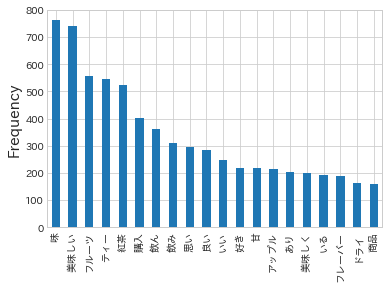

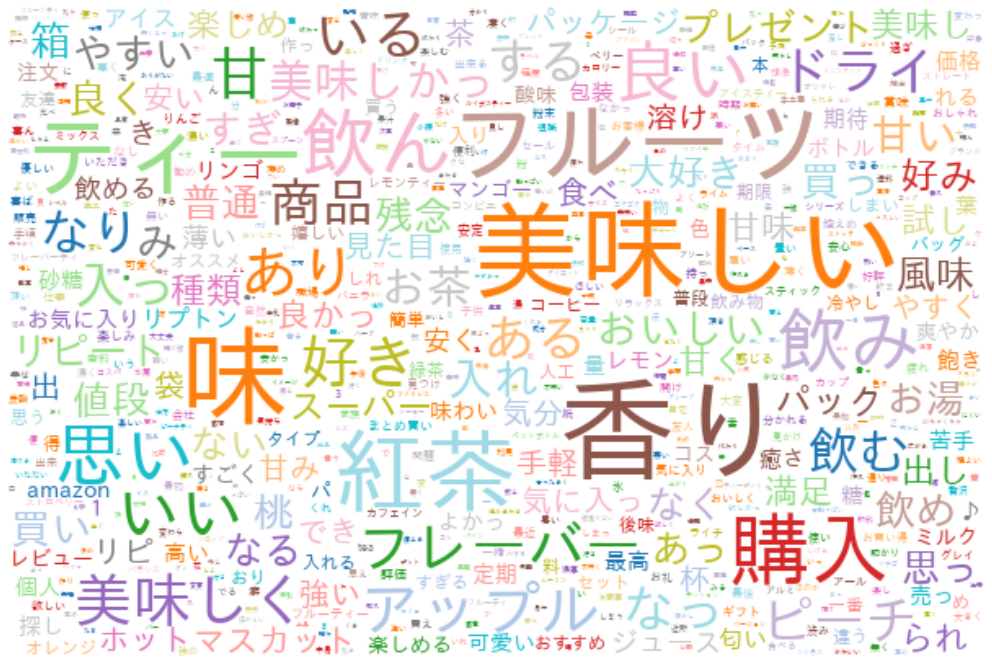

In [8]:
##Split into words and visualize

from sklearn.feature_extraction import stop_words
from collections import Counter, defaultdict
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import MeCab
import sys
import urllib
import nltk
import string
import re
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = "IPAexGothic"

tagger = MeCab.Tagger("/usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
tagger.parse("")

class CustomMeCabTagger(MeCab.Tagger):

    COLUMNS = ["表層形", "品詞", "品詞細分類1", "品詞細分類2", "品詞細分類3", "活用型", "活用形", "原形", "読み", "発音"]

    def parseToDataFrame(self, text: str) -> pd.DataFrame:
        """テキストを parse した結果を Pandas DataFrame として返す"""
        results = []
        #Mecabの出力方式に基づく。(表層系\t品詞,品詞細分類...)
        #まずは改行で分けて単語自体を区分する
        text_unlisted = " ".join([i for item in text for i in item])
        for line in self.parse(text_unlisted).split("\n"):
            #EOS = end of statement, no more words
            if line == "EOS":
                break
            #Split word itself and feature by "tab"
            surface, feature = line.split("\t")
            #Put None if the content is "*" (means nothing)
            feature = [None if f == "*" else f for f in feature.split(",")]
            results.append([surface, *feature])
        return pd.DataFrame(results, columns=type(self).COLUMNS)

def get_dokuritsugo_by_mecab(text):
    tagger = MeCab.Tagger("/usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
    tagger.parse("") 
    node = tagger.parseToNode(text)
    word_list = []
    while node:
        pos = node.feature.split(",")[0]
        #only needs below (others don't have meanings in this context)
        if pos in ["名詞", "動詞", "形容詞"]:
            word = node.surface
            word_list.append(word)
        node = node.next
    return " ".join(word_list)

df_new["cleared_words"] = df_new["combined_title"].apply(lambda x : get_dokuritsugo_by_mecab(x))

stop_words_all = []
#define stopword (English)
nltk.download("stopwords")
stop_words_sklearn = stop_words.ENGLISH_STOP_WORDS
stop_words_nltk = nltk.corpus.stopwords.words("english")
stop_words_nltk.extend(stop_words_sklearn)
stop_words_all = stop_words_nltk

#define stopword (Japanese)
slothlib_path = "http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt"
slothlib_file = urllib.request.urlopen(slothlib_path)
slothlib_stopwords = [line.decode("utf-8").strip() for line in slothlib_file]
slothlib_stopwords = [ss for ss in slothlib_stopwords if not ss==u'']
stop_words_all.extend(slothlib_stopwords)

#define manual stopword
add_words=["'",u"それ",u"てる",u"よう",u"こと",u"の",u"し",u"い",u"ん",u"さ",u"て",u"せ",u"れ"]
stop_words_all.extend(add_words)

def del_stop_words(text):
    #replace all the punctuations by using re.sub()
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    sample = regex.sub("", text)
    
    #change to lower case and check if it's in stop words list
    words = [w.lower()  for w in sample.split(" ") \
                 if not w.lower()  in stop_words_all]
    words=" ".join(words)
    return words

def del_single_used_words(text):
    #delete words only used once
    frequency = defaultdict(int)
    for words in text:
        for token in words:
            frequency[token] += 1
    words = [[token for token in words if frequency[token] > 1] for words in text]
    return words

df_new["cleared_stopwords"] = list(df_new["cleared_words"].apply(lambda x: del_stop_words(x)))
text = del_single_used_words([i.split(" ") for i in df_new["cleared_stopwords"]])

##Make combined list for doc2vec (now also used for LDA&word2Vec)
df_new_combined["cleared_words"] = df_new_combined["combined_title"].apply(lambda x : get_dokuritsugo_by_mecab(x))
df_new_combined["cleared_stopwords"]=list(df_new_combined["cleared_words"].apply(lambda x: del_stop_words(x)))
text_combined = del_single_used_words([i.split(" ") for i in df_new_combined["cleared_stopwords"]])

#finally make dataframe of wordlist splitted by MeCab
tagger = CustomMeCabTagger()
print(text_combined)
result = tagger.parseToDataFrame(text_combined)

counter_list = []
for i in result["表層形"]:
    counter_list.append(i)
word_count = Counter(counter_list)

df_count = pd.DataFrame.from_dict(word_count,orient='index').reset_index()
df_count.columns=["word","count"]
df_count.sort_values("count",ascending=False,inplace=True)
df_count = df_count.iloc[1:,:]

print(df_count.head(30))

#Visualization for word count graph
plt.figure(figsize = (30,20))
ax=df_count.iloc[:20,:].plot.bar()
ax.set_ylabel("Frequency",fontsize=15)
ax.set_xticklabels(
    df_count.iloc[:20,:]["word"], fontdict = {
        'fontsize':10})
ax.legend_.remove()
plt.style.use('seaborn-whitegrid')
plt.show()

fpath = "/Users/motoki/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/ipaexg.ttf"
#Visualization for word cloud
wc_bz = WordCloud(
    background_color="white",
    width=600,
    height=400,
    max_words=3000,
    max_font_size=70,
    font_path=fpath,
    prefer_horizontal=1,
    include_numbers=True,
    colormap='tab20',
    regexp=r"[\w']+")
wc_bz.generate_from_frequencies(word_count)

plt.figure(figsize = (21,12))
#sns.set_style("whitegrid")
plt.imshow(wc_bz, interpolation="bilinear")
plt.axis("off")
plt.style.use('seaborn-whitegrid')
plt.show()

In [19]:
print(text_unlisted)

NameError: name 'text_unlisted' is not defined

In [43]:
# word frequency output to csv

import datetime

now = datetime.datetime.today()
today = now.strftime("%Y%m%d")

output_dir = "/Users/motoki/PycharmProjects/motoki_ul/review_analysis/output_dir/amazon"
filename = f"{today}_{'black'}_review.csv"
df_count.to_csv(f"{output_dir}/{filename}")

df_count

word  count
5        味    412
4       香り    308
18    美味しい    250
9      ティー    227
52      購入    193
...    ...    ...
1071    一品      1
296      せ      1
588      買      1
747      経      1
1128     知      1

[1281 rows x 2 columns]

In [44]:
##TF-IDF analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

df_new_combined["cleared_words"] = df_new_combined["combined_title"].apply(lambda x : get_dokuritsugo_by_mecab(x))
df_new_combined["cleared_stopwords"] = df_new_combined["cleared_words"].apply(lambda x: del_stop_words(x))
text_combined_tfidf = [i for i in df_new_combined["cleared_stopwords"]]

vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(text_combined_tfidf)
X=X.toarray()

idf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
df_idf = pd.DataFrame(columns=['idf']).from_dict(
                    dict(idf), orient='index')
df_idf.columns = ['idf']
display(df_idf.sort_values("idf").head(10).T)

バッグ  ティー   購入  パッケージ   なり  嬉しい   風味   手軽   香り  スーパー
idf  1.0  1.0  1.0    1.0  1.0  1.0  1.0  1.0  1.0   1.0

In [45]:
##t-SNE for TF-IDF
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

tsne= TSNE(n_components=2, verbose=1, n_iter=1000)
tsne_tfidf = tsne.fit_transform(X)

[t-SNE] Computing 8 nearest neighbors...
[t-SNE] Indexed 9 samples in 0.001s...
[t-SNE] Computed neighbors for 9 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 9 / 9
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.913818
[t-SNE] KL divergence after 1000 iterations: 0.225961


In [46]:
#Put in DataFrame
df_tsne = pd.DataFrame(tsne_tfidf[:,0],columns = ["x"])
df_tsne["y"] = pd.DataFrame(tsne_tfidf[:,1])
df_tsne["product_name"]=df_new_combined.product_name
df_tsne["brand"]=df_new_combined.brand

pd.set_option('display.max_rows', 1000)
display(df_tsne)

x           y                                       product_name  \
0  -13.027042 -135.377380  AHMAD TEA ( アーマッドティー ) イングリッシュブレックファースト ティーバッグ...   
1   45.975197  -57.483097  AHMAD TEA (アーマッドティー) アールグレイ ティーバッグ 100袋入り [ 英国...   
2  -84.977249   43.864193        【Amazon.co.jp限定】 リプトン紅茶 イエローラベル 120袋 ティーバッグ   
3  141.927490  -39.011402  アーマッドティー アールグレイ リーフ ( 茶葉 ) 200g 缶 [ 紅茶 AHMAD T...   
4    2.863317   11.754606                トワイニング アールグレイ セレクションファイブ 50P ティーバッグ   
5  -70.847908  -57.625790             リプトン紅茶 イエローラベル 50 [紅茶 ティーバッグ] 2.0gx50袋   
6   12.924786  104.743416                      リプトン紅茶 ピュア&シンプルティーバッグ 100袋×3個   
7   97.698013   47.206726                          日東紅茶 DAY&DAY ティーバッグ 50袋入り   
8   94.975441 -136.293518  神戸紅茶【紅茶鑑定士が選ぶ】7種の高級茶葉 28杯分(各４Ｐ×７種)７種の香り ギフトセット...   

                  brand  
0  AHMAD TEA (アーマッドティー)  
1  AHMAD TEA (アーマッドティー)  
2                  リプトン  
3  AHMAD TEA (アーマッドティー)  
4                トワイニング  
5                  リプトン  
6                  リプトン  
7                  日東紅茶  
8            BAYU STORE

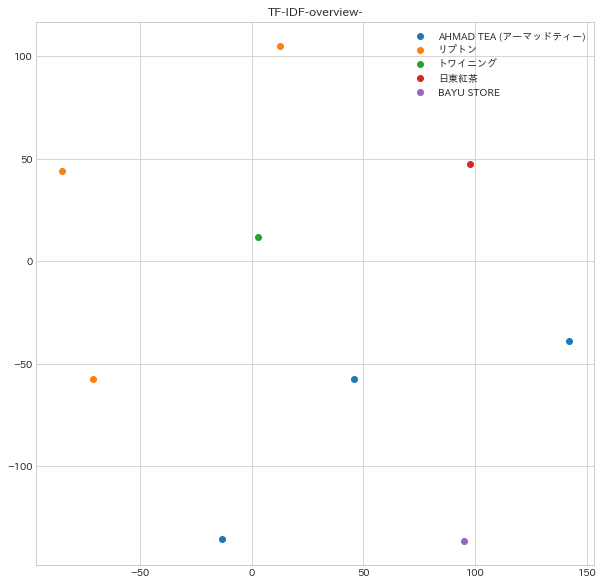

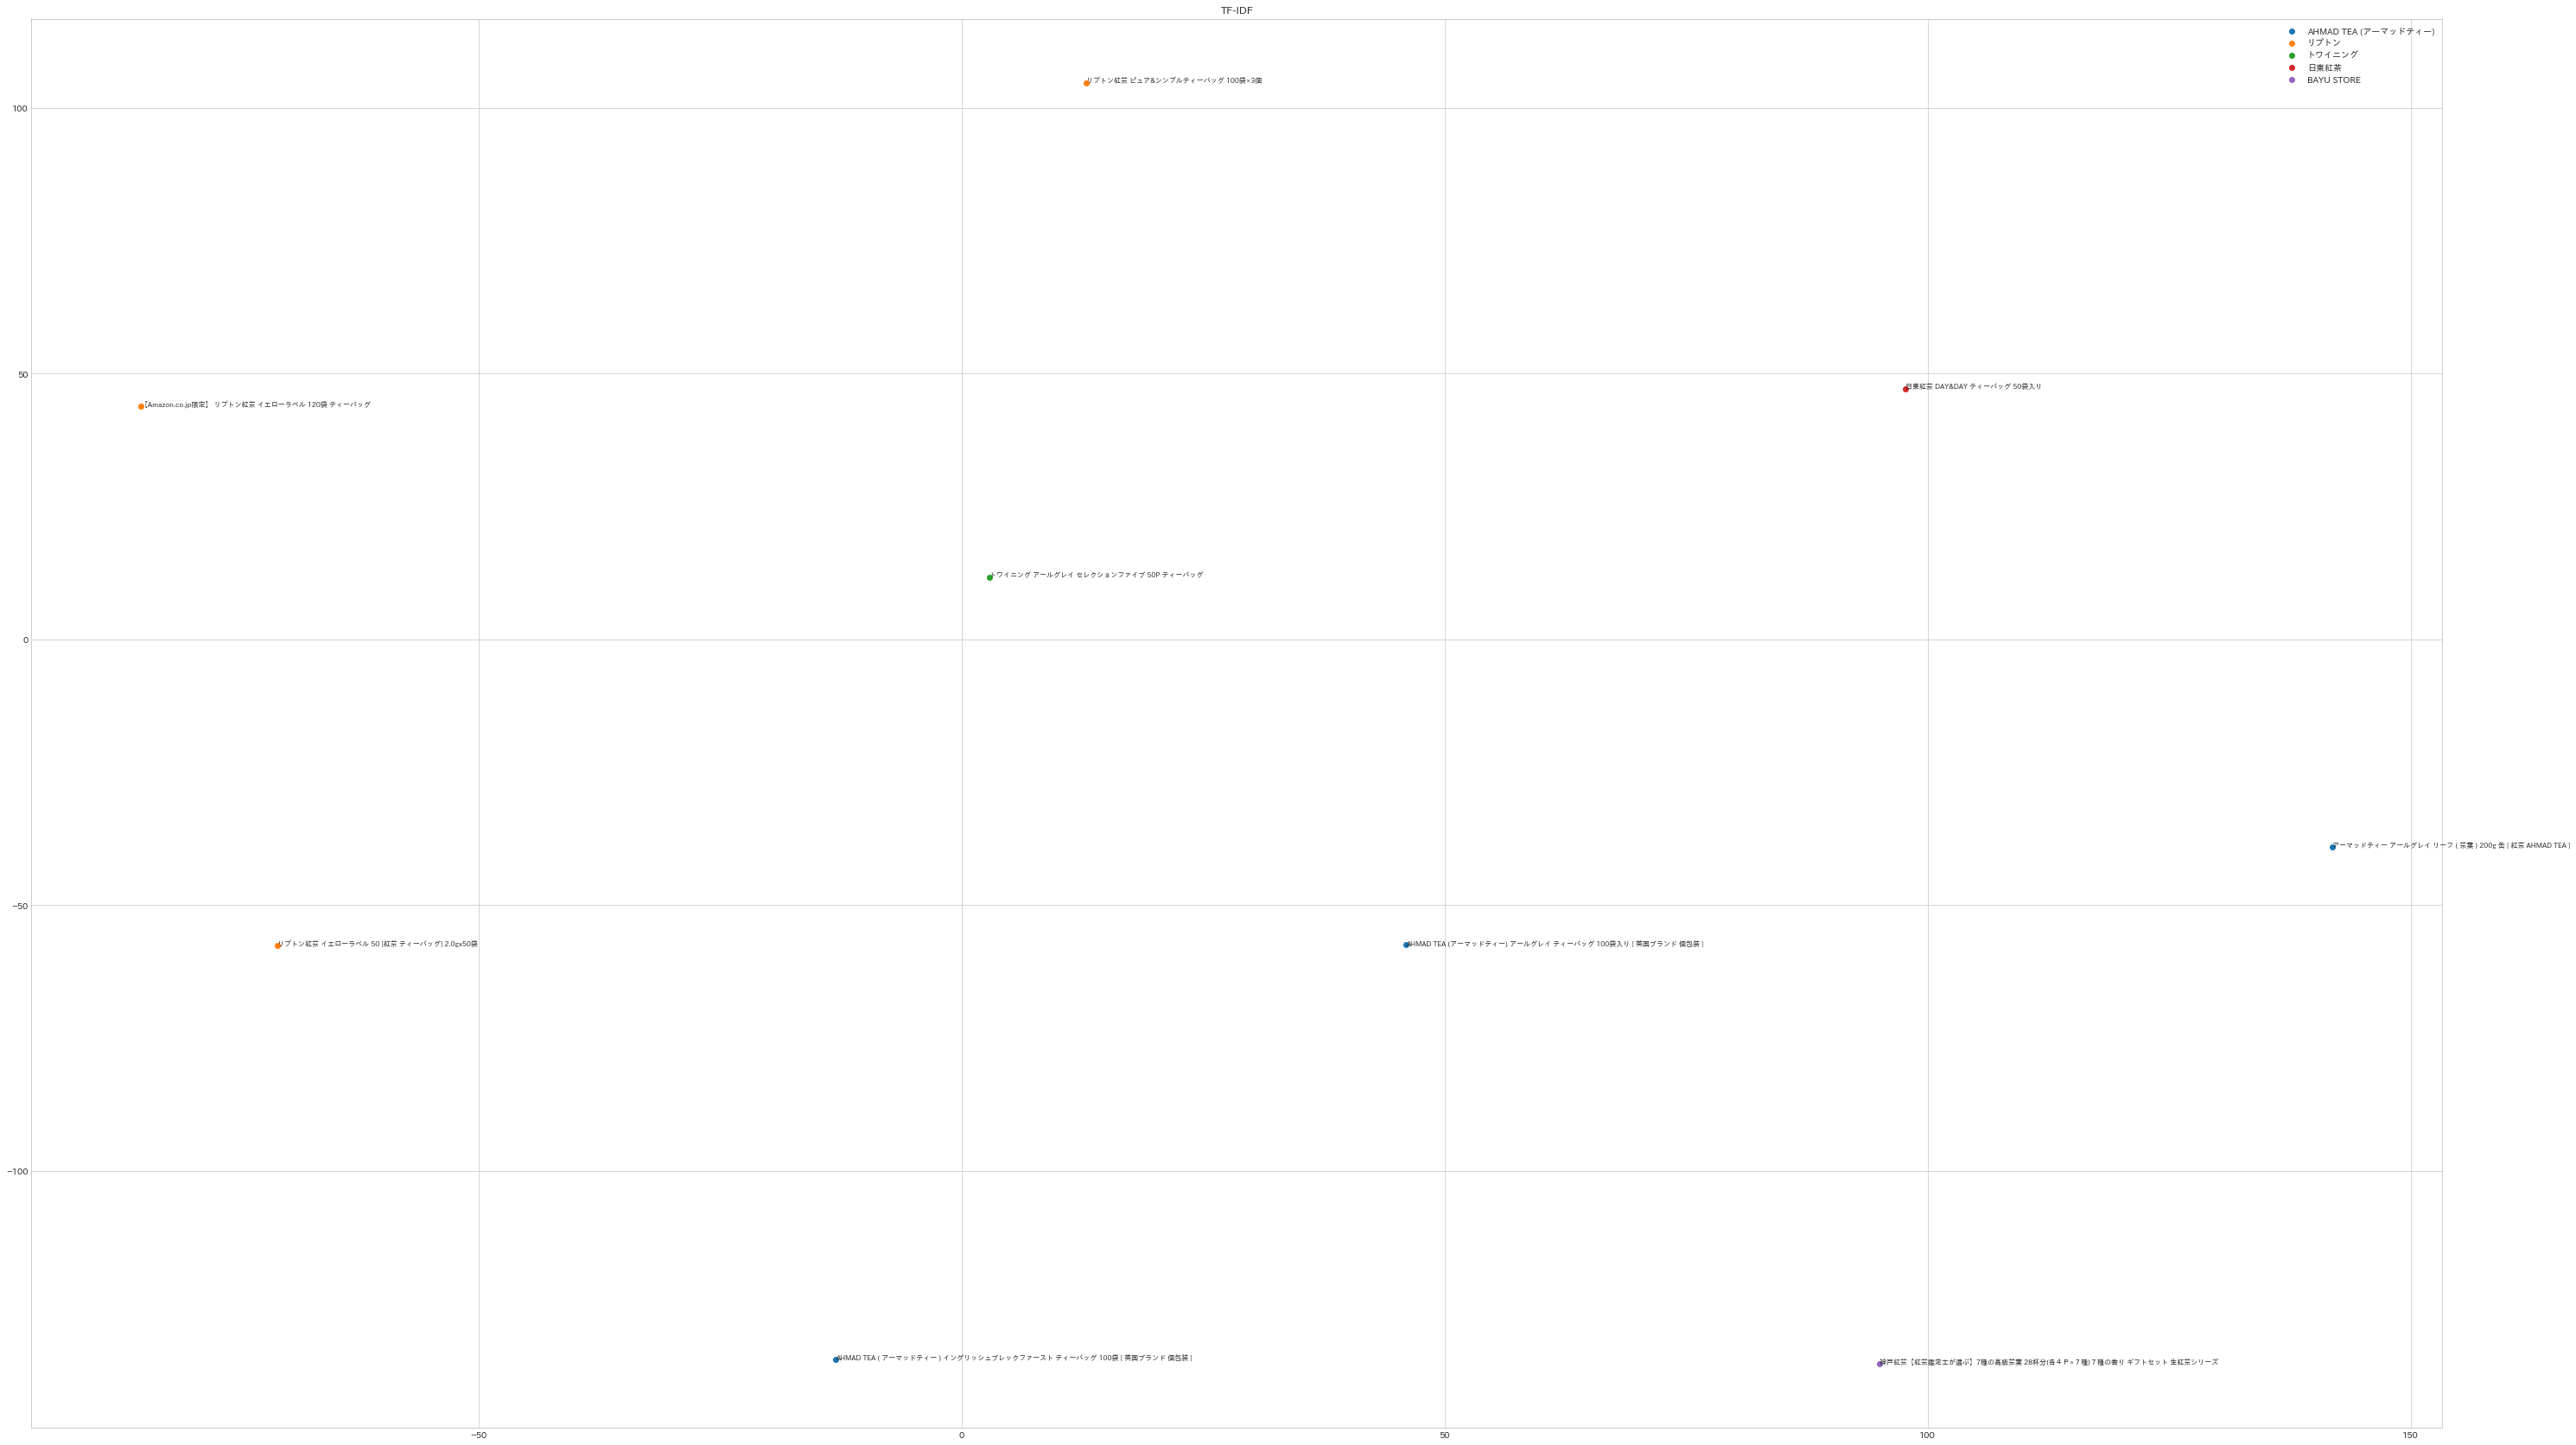

In [47]:
##Visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'IPAexGothic'

#A: Overlook
fig_overview = plt.figure(figsize=(10.0, 10.0))
for f in df_tsne['brand'].unique():
    plt.scatter(df_tsne.loc[df_tsne.brand == f ,'x'], df_tsne.loc[df_tsne.brand == f ,'y'], label=f)

plt.legend()
plt.title("TF-IDF-overview-")
plt.show()

#B: Detail
fig_detail = plt.figure(figsize=(50.0, 30.0))
for f in df_tsne['brand'].unique():
    plt.scatter(df_tsne.loc[df_tsne.brand == f ,'x'], df_tsne.loc[df_tsne.brand == f ,'y'], label=f)

for i, txt in enumerate(df_tsne["product_name"].values):
    plt.annotate(txt, (df_tsne["x"].values[i], df_tsne["y"].values[i]), fontsize=8)
    
plt.legend()
plt.title("TF-IDF")
plt.show()

In [56]:
##LDA analytics (after filtering TF-IDF)

import gensim
from gensim import corpora, models

#Dictionary is the set of "word ID, word, frequency" data (can be saved)
dictionary =corpora.Dictionary(text)
corpus = [dictionary.doc2bow(doc) for doc in text_combined]

#Can filter TF-IDF before LDA
#TF = Term Frequency -> frequency of each word (the bigger, the more important)
#IDF = Inverse document frequency -> filtering too high frequent words like "a, the, there etc.."
#Below is the class for TF-IDF analytics
#tfidf = gensim.models.TfidfModel(corpus)
#corpus_tfidf = tfidf[corpus]

#Number of topics
zk = 3
#Learning model (can be saved)
lda = gensim.models.LdaModel(corpus=corpus, id2word=dictionary,
                             num_topics=zk, minimum_probability=0.001,
                             passes=20, update_every=0, chunksize=10000)

for i in range(zk):
    print('tpc_{0}: {1}'.format(i, lda.print_topic(i)[0:80]+'...'))

tpc_0: 0.040*"" + 0.028*"紅茶" + 0.028*"味" + 0.024*"香り" + 0.019*"美味しい" + 0.017*"ティー" + 0....
tpc_1: 0.028*"グレイ" + 0.025*"味" + 0.024*"アール" + 0.024*"" + 0.023*"紅茶" + 0.018*"香り" + 0.0...
tpc_2: 0.038*"" + 0.029*"紅茶" + 0.027*"味" + 0.017*"ティー" + 0.017*"香り" + 0.016*"パック" + 0.0...


product_name    Prob_1    Prob_2  \
0  AHMAD TEA ( アーマッドティー ) イングリッシュブレックファースト ティーバッグ...  0.999104  0.000201   
1  AHMAD TEA (アーマッドティー) アールグレイ ティーバッグ 100袋入り [ 英国...  0.996816  0.002949   
2        【Amazon.co.jp限定】 リプトン紅茶 イエローラベル 120袋 ティーバッグ  0.014636  0.000207   
3  アーマッドティー アールグレイ リーフ ( 茶葉 ) 200g 缶 [ 紅茶 AHMAD T...  0.026590  0.167067   
4                トワイニング アールグレイ セレクションファイブ 50P ティーバッグ  0.000263  0.999484   
5             リプトン紅茶 イエローラベル 50 [紅茶 ティーバッグ] 2.0gx50袋  0.006053  0.000186   
6                      リプトン紅茶 ピュア&シンプルティーバッグ 100袋×3個  0.966464  0.000191   
7                          日東紅茶 DAY&DAY ティーバッグ 50袋入り  0.999368  0.000253   
8  神戸紅茶【紅茶鑑定士が選ぶ】7種の高級茶葉 28杯分(各４Ｐ×７種)７種の香り ギフトセット...  0.000353  0.999299   

     Prob_3  Max  
0  0.000694    1  
1  0.000235    1  
2  0.985156    3  
3  0.806343    3  
4  0.000253    2  
5  0.993761    3  
6  0.033345    1  
7  0.000379    1  
8  0.000348    2

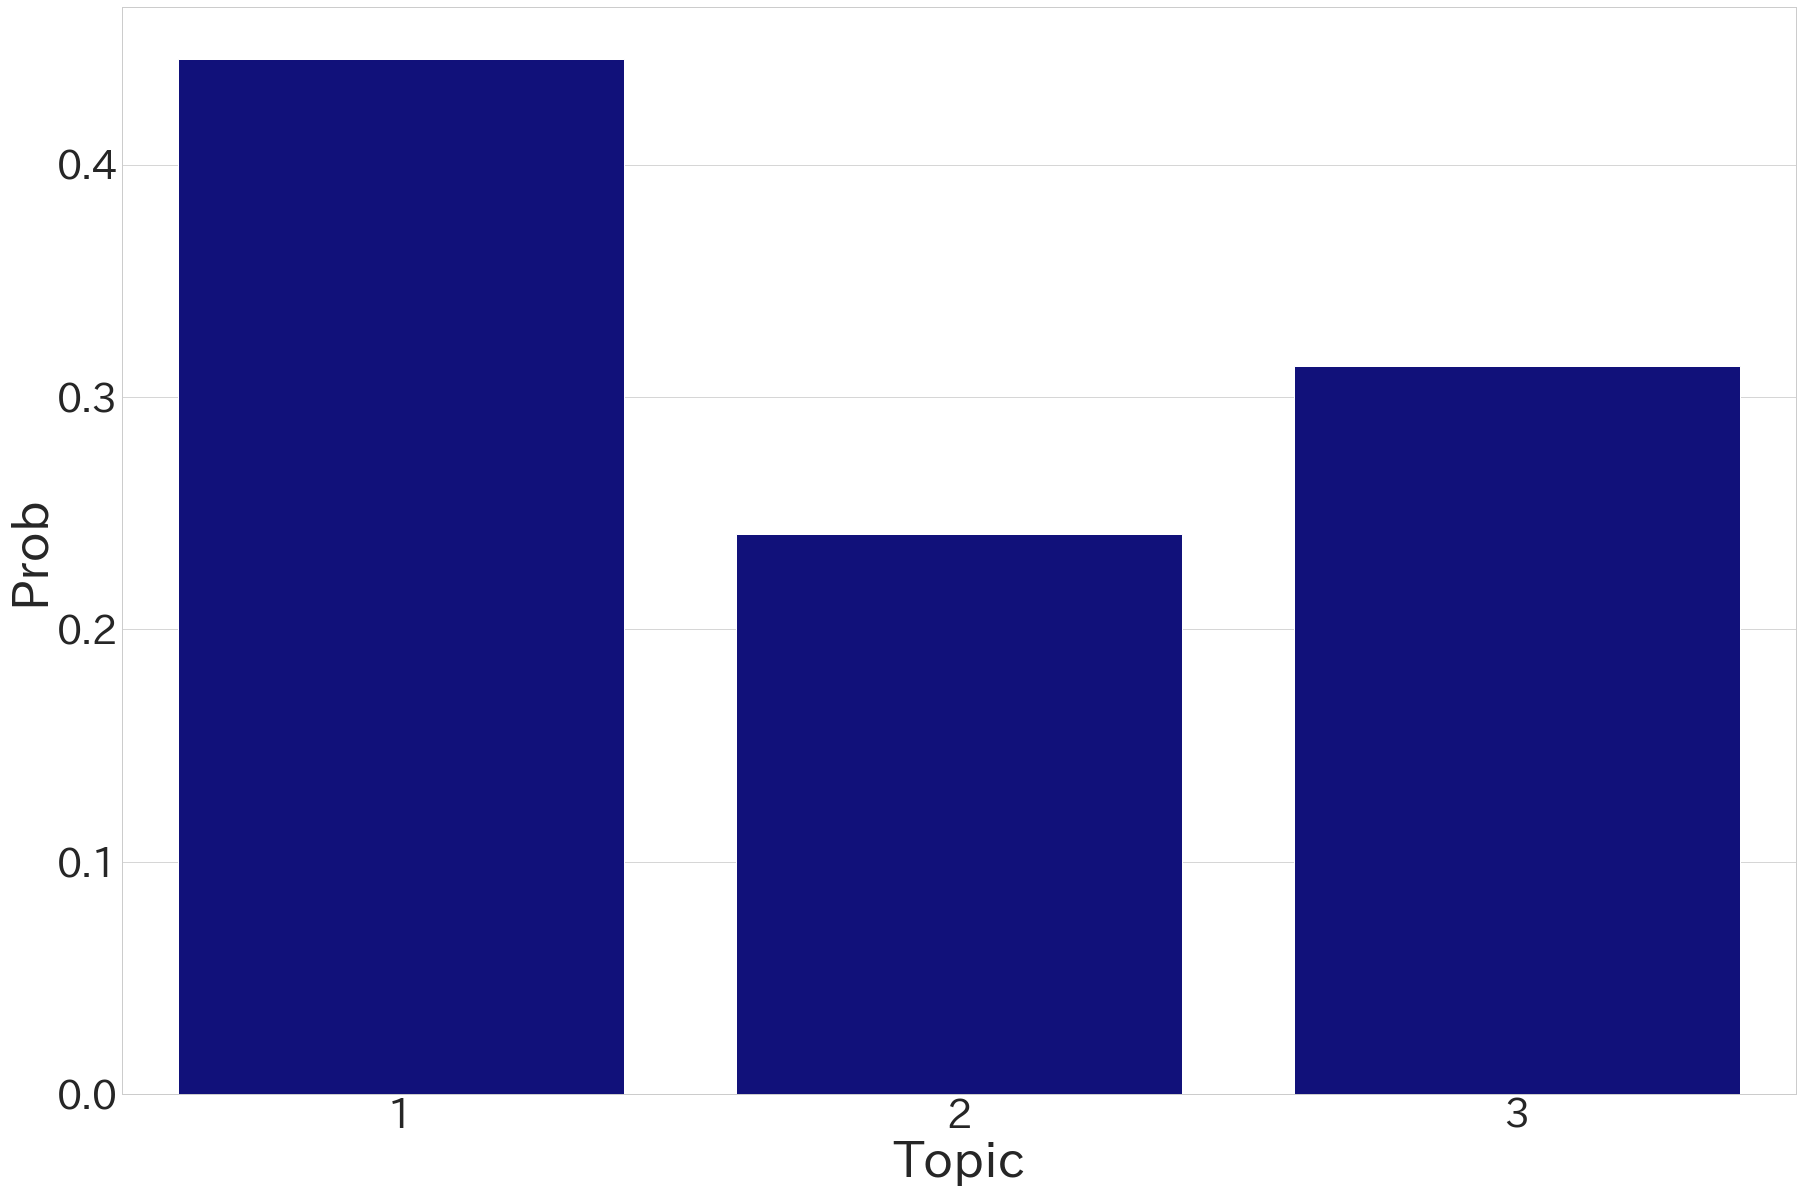

In [57]:
#Make Numpy b/w Products & topics
Prob_products=np.array(lda.get_document_topics(corpus,minimum_probability=0))[:,:,1]

#Put in DataFrame
L=[ z for z in range(1,zk+1)]
col_name=list(map(lambda x: "Prob_"+str(x),L))
df_prob=pd.DataFrame(Prob_products)
df_prob.columns=col_name

#Add product name & most likely belonging topic No.
df_prob["Max"]=df_prob.idxmax(axis=1)
def del_Prob(x):
    return int(x.split("_")[1])
df_prob["Max"]=df_prob["Max"].apply(lambda x : del_Prob(x))
df_prob.insert(0, "product_name", df_new_combined["product_name"])
display(df_prob.head(30))

#Calculate probability of apperance of each topic
df_topic=pd.DataFrame(df_prob.drop(["Max", "product_name"],axis=1).sum()/df_prob.drop(["Max", "product_name"],axis=1).sum().sum())
df_topic.columns=["Prob"]
df_topic["Topic"]=[ z for z in range(1,zk+1)]

#Visualization
plt.figure(figsize = (30,20))
ax= sns.barplot(x="Topic",y="Prob",data=df_topic,color="darkblue")
ax.set_xlabel("Topic",fontsize=50)
ax.set_ylabel("Prob",fontsize=50)
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
plt.show()

<Figure size 1512x864 with 0 Axes>

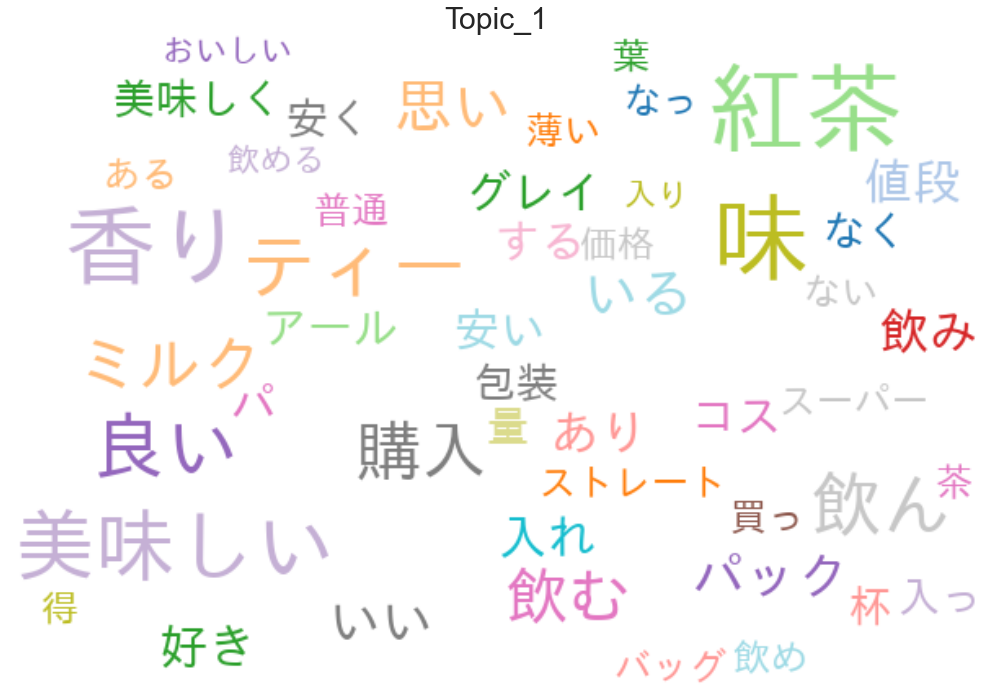

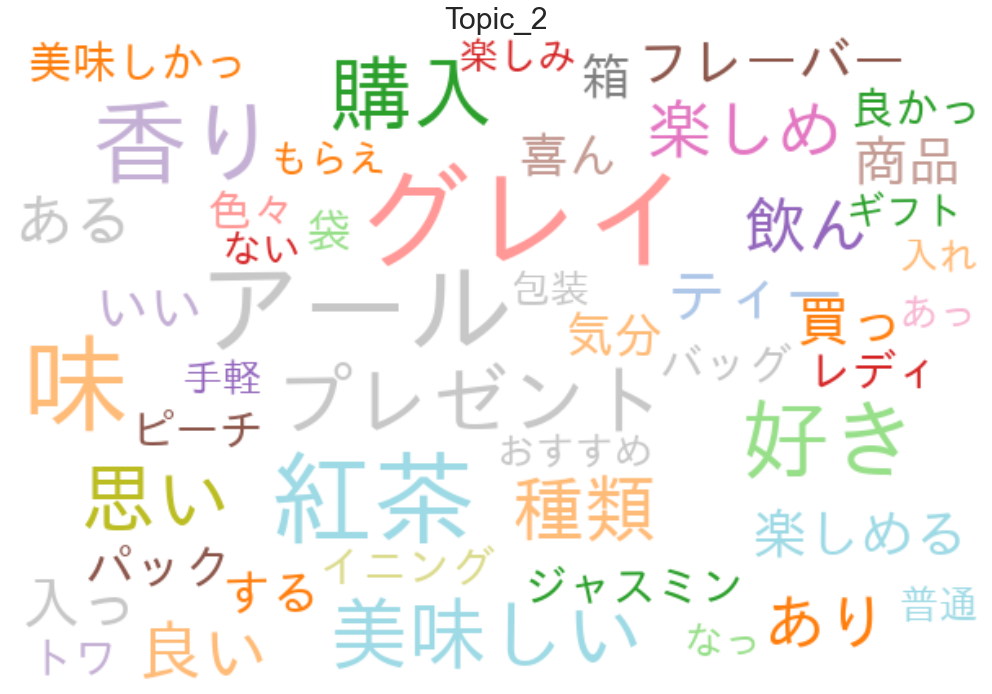

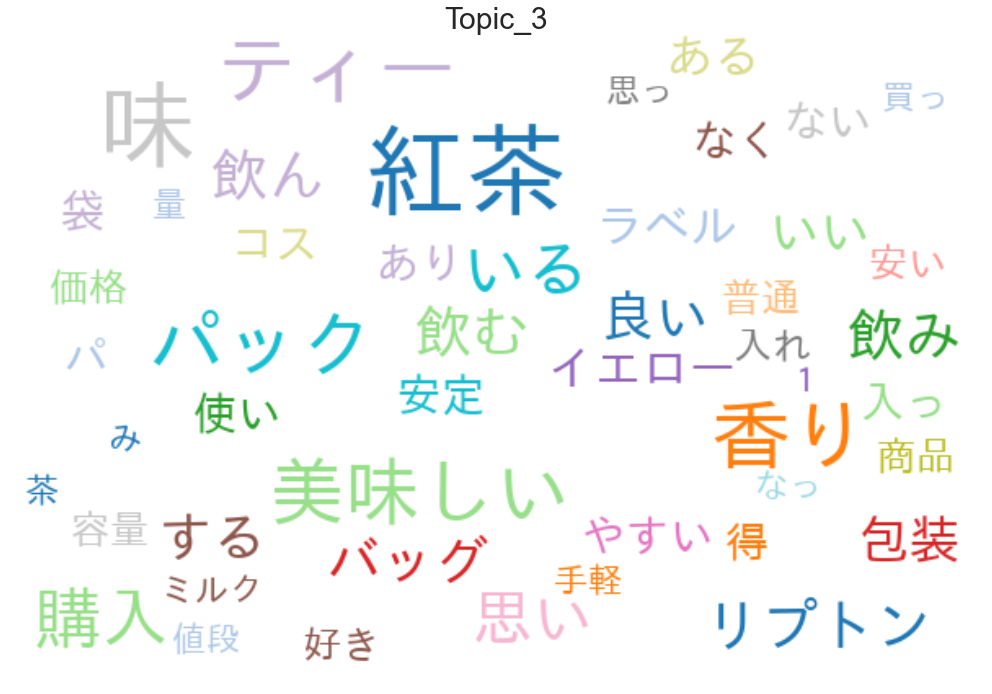

In [58]:
##Visualization of words

topic_word_prob=[]

for z in range(zk):
    word=[]
    prob=[]
    topic = lda.show_topic(z,1000) #No. of words

    for t in topic:
        word.append(t[0])
        prob.append(t[1])
        
    df_lda=pd.DataFrame({"word":word,"prob":prob})
    topic_word_prob.append(df_lda)

fig = plt.figure(figsize=(21, 12))

for z in range(zk):
    topic_text=[]
    for index, row in topic_word_prob[z].iloc[:2000,].iterrows():
        word=row["word"]
        weight=int(row["prob"]*1000)
        for _ in range(weight):
            topic_text.append(word)
            
    words = Counter(topic_text)
    wc_bz = WordCloud(background_color="white",
                      width=600, 
                      height=400, 
                      max_words=50, 
                      max_font_size=70, 
                      font_path=fpath,
                      prefer_horizontal=1,
                      include_numbers=True,
                      colormap='tab20',
                      regexp=r"[\w']+")
    wc_bz.generate_from_frequencies(words)

    plt.figure(figsize = (21,12))
    sns.set_style("whitegrid")
    plt.title('Topic_{}'.format(z+1), fontsize=30)
    plt.imshow(wc_bz, interpolation='bilinear')
    plt.axis("off")
    
    # topic groups output to png
    output_dir = "/Users/motoki/PycharmProjects/motoki_ul/review_analysis/output_dir/amazon"
    pngname =  f"{today}_{zk}topics"
    plt.savefig(f'{output_dir}/{pngname}_{z+1}.png')
    plt.show()

In [148]:
##Word2Vec Analysis
from gensim.models import word2vec

sent = text_combined
#Learning word2vec model
model = word2vec.Word2Vec(sent,
                          vector_size=50,  # Demention of vector (depends on the number of unique words)
                          min_count=2,  # Words appearing at least 2 times
                          window=5,  # Width of window
                          epochs=4000,  # Iter numbers of leaning
                          seed=2018 # Fix seed for generating stable random number
                         )

In [20]:
word = "不味い"
# Output the most similar words & similarity index
results = model.wv.most_similar(positive=word,topn=20)  
# Show in DataFrame
df_result = pd.DataFrame(results,columns=["Word","Sim"])
print("_{}_".format(word))
display(df_result.T)

_不味い_


0         1         2         3         4         5         6   \
Word       かなり        必需        評判        単体        キン      ホッコリ   ブレイクタイム   
Sim   0.468566  0.373322  0.371595  0.365993  0.362261  0.345658  0.343362   

            7        8         9         10        11       12        13  \
Word        中毒    ミルクティ      インスタ       ･･･        情報       困っ         良   
Sim   0.343343  0.34238  0.339875  0.329185  0.328317  0.32561  0.321782   

            14        15        16        17        18       19  
Word       すすめ         淹        勿体        後悔        長め       無い  
Sim   0.310677  0.305371  0.304853  0.303978  0.299306  0.29847

In [72]:
## Plus/Minus words and show the similarities
results = model.wv.most_similar(positive=[u"ルイボスティー",u"美味しい"], negative=[u"フルーツ"], topn=20)
df_result = pd.DataFrame(results,columns=["Word","Sim"])
display(df_result.T)

0         1         2        3         4         5         6   \
Word        飲み      美味しく      リピート     おいしい        飲ん        今後         味   
Sim   0.638859  0.608489  0.542307  0.52703  0.507336  0.480674  0.476119   

            7         8         9         10        11        12        13  \
Word       やすい        お茶      受け付け        購入        思い     美味しかっ        子供   
Sim   0.473347  0.453146  0.413017  0.392631  0.390928  0.376487  0.375107   

            14        15        16        17        18        19  
Word    ルイボスティ        通じ        容量        登山       代わり        麦茶  
Sim   0.374967  0.373728  0.372173  0.360876  0.357551  0.352564

In [149]:
#Make array of mean vector b/w No. of products & vector dementions
product_vec = np.zeros((df_new_combined.shape[0],50))

for i,product in enumerate(text_combined):
    #print(df_new_combined.product[i])
    feature_vec = np.zeros(50)
    num_words = 0
    for word in product:
        try:
            feature_vec += model.wv[word]
            num_words += 1
        except:
            print(f"{word}_is_not_in_dic")
    feature_vec = feature_vec / num_words  # Split sum of all the words vector
    product_vec[i] = feature_vec

##t-SNE for Word2Vec
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, n_iter=500)
tsne_word2vec = tsne.fit_transform(product_vec)

[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 86 samples in 0.000s...
[t-SNE] Computed neighbors for 86 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 86 / 86
[t-SNE] Mean sigma: 2.571255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.171688
[t-SNE] KL divergence after 500 iterations: 0.891428


x           y                                            product  \
0   -9.026937  -33.543262  EDOBIO リラックスフロー ブレンド ハーブティー ティーバッグ ノンカフェイン 飲みや...   
1 -108.055092  149.031387  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   
2   25.616755   -6.236207  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   
3  -12.363104   -3.576346  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   
4  -31.689781  -12.330198  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   
5  -40.232700   56.994160  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   
6   -3.029243   52.632267  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   
7   44.381340  -16.434723  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   
8    8.751851    9.153873  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   
9  -25.335423  -44.001690  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   

                  brand  
0                EDOBIO  
1  Pukka Herbs(パッカハーブス)  
2  Pukka Herbs(パッカハーブス)  
3  Pukka Herbs(パッカハーブス)  
4  Pukka Herbs(パッカハーブス)  
5  Pukka Herbs(パッカハーブス)  
6  Pukka Herbs(パッカハーブス)  
7  Pukka Herbs(パッカハーブス)  
8  Pukka Herbs(パッカハーブス)  
9  Pukka Herbs(パッカハーブス)

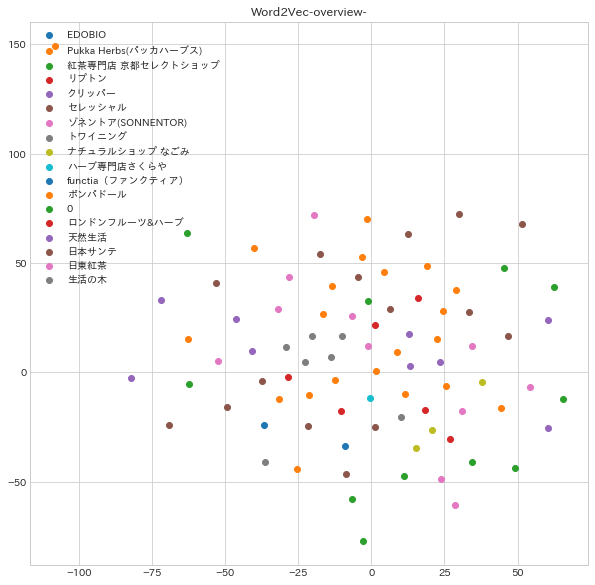

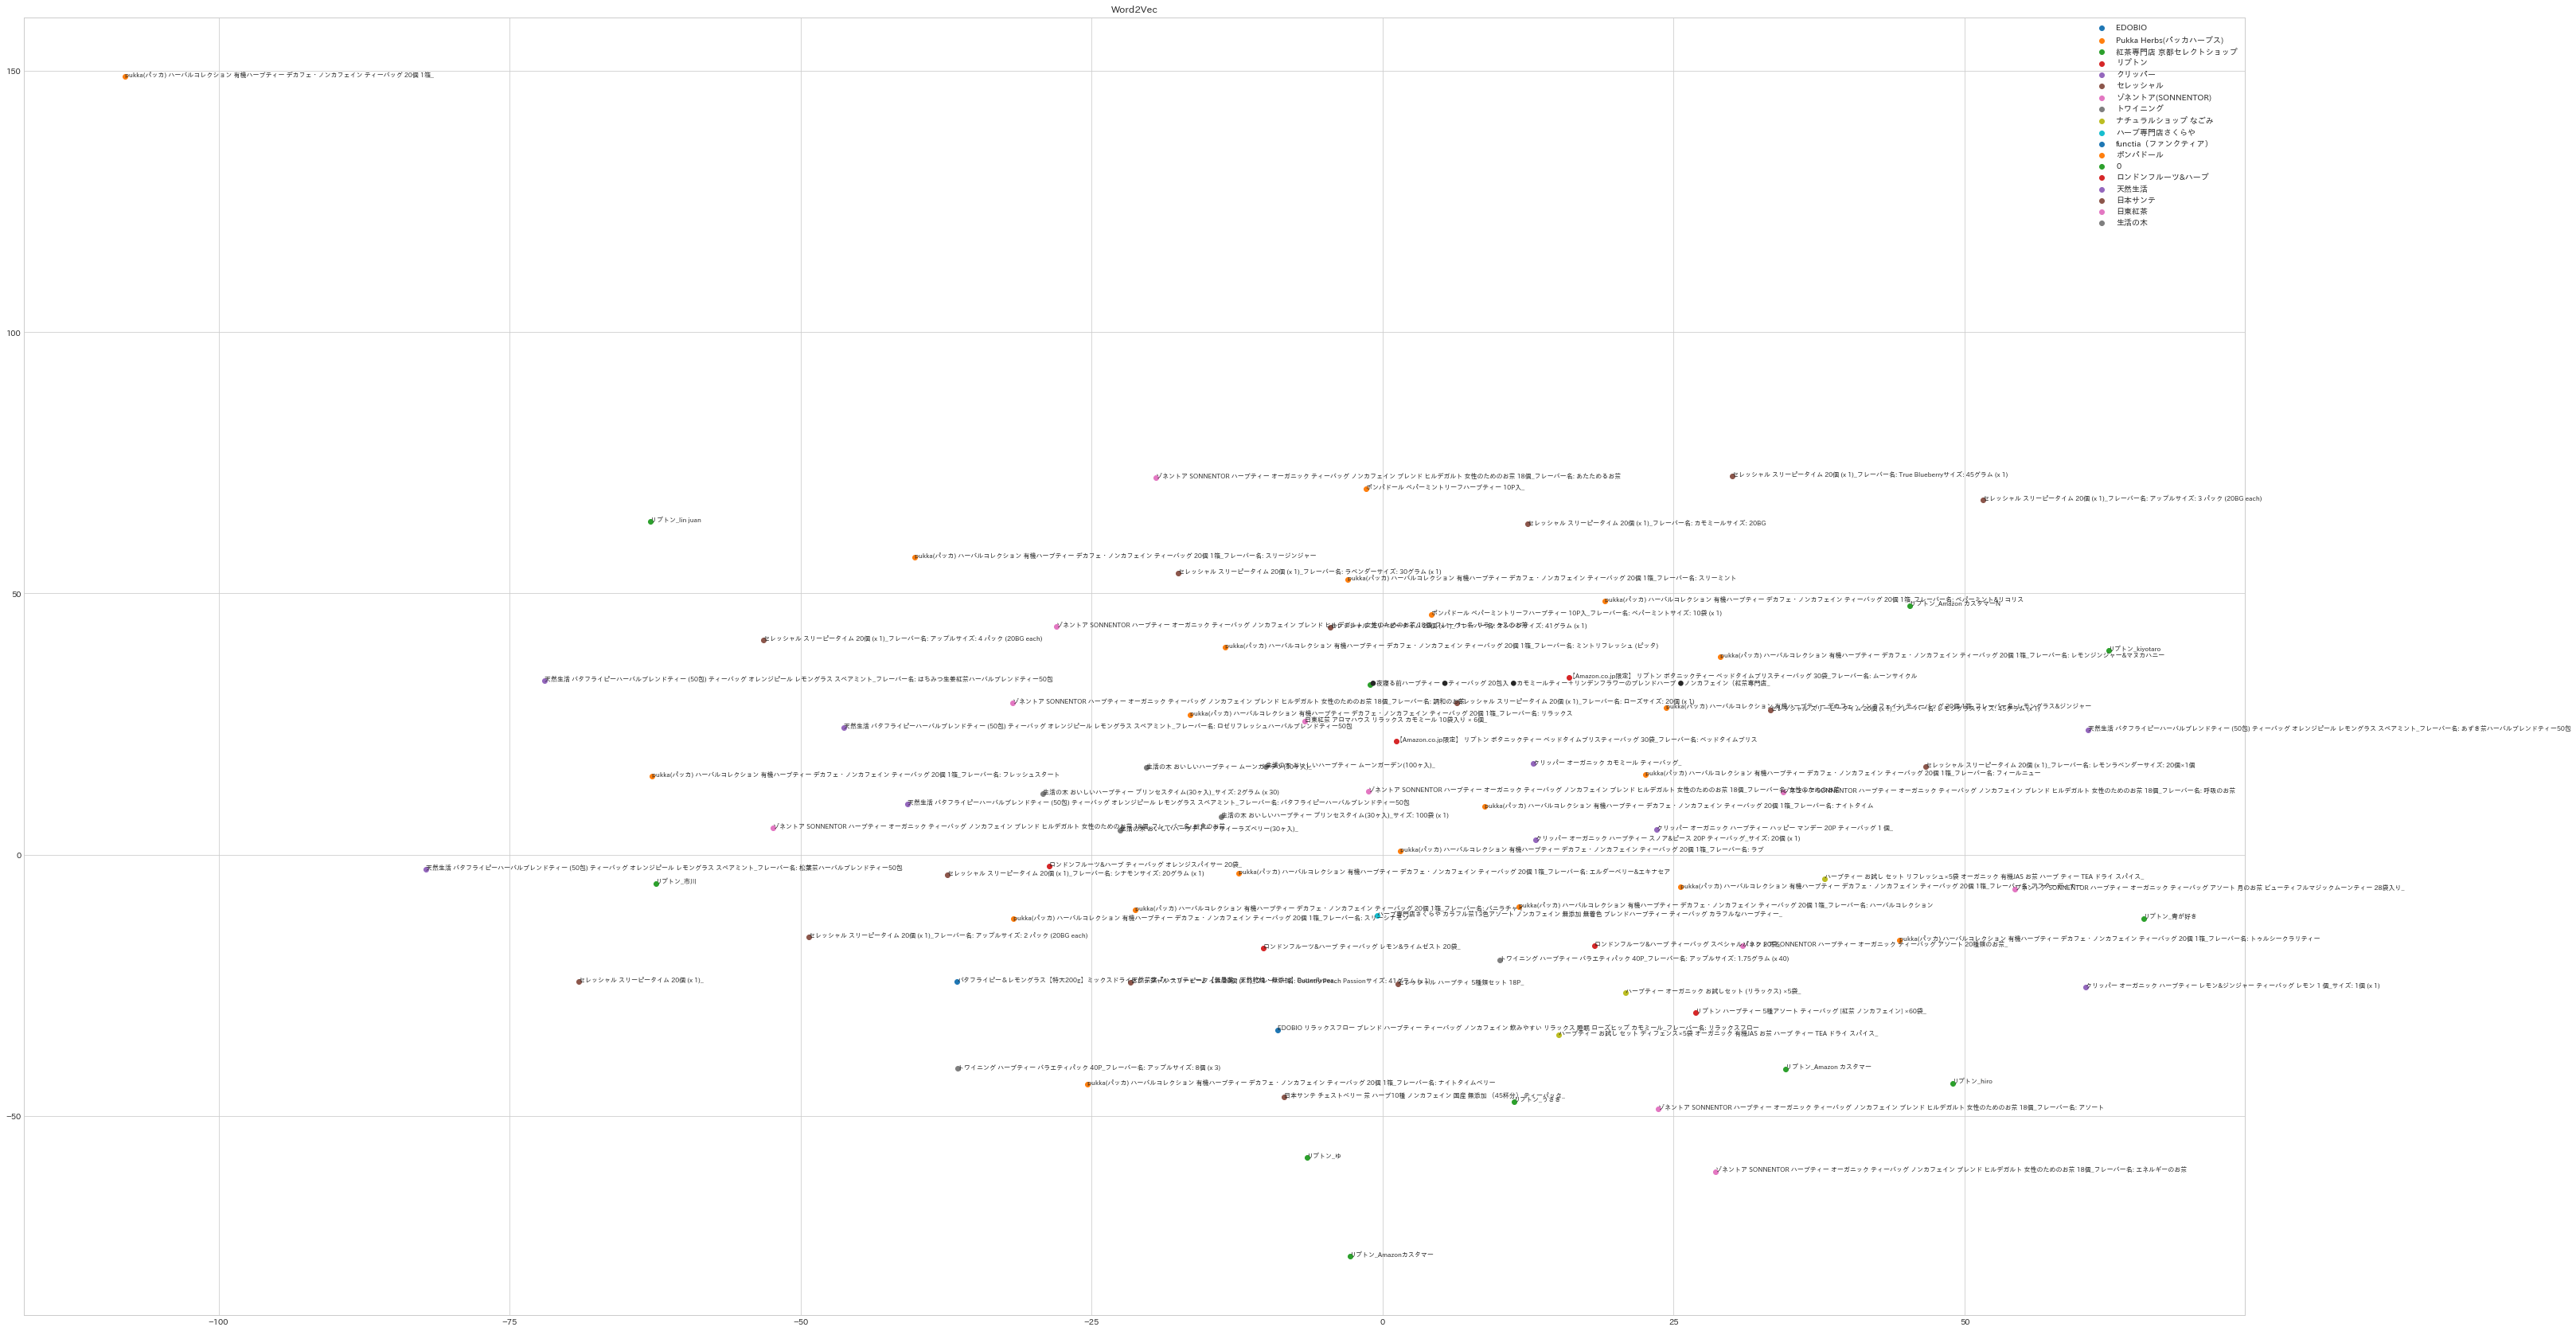

In [150]:
#Put in DataFrame
df_tsne_word2vec = pd.DataFrame(tsne_word2vec[:, 0],columns = ["x"])
df_tsne_word2vec["y"] = pd.DataFrame(tsne_word2vec[:, 1])
df_tsne_word2vec["product"] = df_new_combined.product_name 
df_tsne_word2vec["brand"] = df_new_combined.brand

pd.set_option('display.max_rows', 1000)
display(df_tsne_word2vec.head(10))

##Visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.family'] = 'IPAexGothic'

#A: Overlook
fig_overview_word2vec = plt.figure(figsize=(10.0, 10.0))
for f in df_tsne_word2vec['brand'].unique():
    plt.scatter(df_tsne_word2vec.loc[df_tsne_word2vec.brand == f ,'x'], df_tsne_word2vec.loc[df_tsne_word2vec.brand == f ,'y'], label=f)

plt.legend()
plt.title("Word2Vec-overview-")

#B: Detail
fig_detail_word2vec = plt.figure(figsize=(50.0, 30.0))
for f in df_tsne_word2vec['brand'].unique():
    plt.scatter(df_tsne_word2vec.loc[df_tsne_word2vec.brand == f ,'x'], df_tsne_word2vec.loc[df_tsne_word2vec.brand == f ,'y'], label=f)

for i, txt in enumerate(df_tsne_word2vec["product"].values):
    plt.annotate(txt, (df_tsne_word2vec["x"].values[i], df_tsne_word2vec["y"].values[i]), fontsize=8)
    
plt.legend()
plt.title("Word2Vec")

plt.show()

In [151]:
##Doc2Vec analysis

from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim import corpora, models

trainings_combined = [TaggedDocument(words=data, tags=[name]) for (name, data) in zip(df_new_combined["product_name"], text_combined)]

# Learning model
model_doc_combined = models.Doc2Vec(
    documents=trainings_combined,
    vector_size=50,
    min_count=2,
    epochs=4000
)

In [129]:
word = "リプトン"
# Output the most similar words & similarity index
results = model_doc_combined.wv.most_similar(positive=word,topn=20)  
# Show in DataFrame
df_result = pd.DataFrame(results,columns=["Word","Sim"])
print("_{}_".format(word))
display(df_result.T)

_リプトン_


0         1         2         3         4         5         6   \
Word       我が家         大      スムーズ     ahmad         で        過敏      見つける   
Sim   0.625228  0.486655  0.482306  0.468141  0.458941  0.448989  0.421778   

            7         8         9         10        11        12        13  \
Word        汁粉       ローズ        ok        コス        時代        裏面      嬉しかっ   
Sim   0.421444  0.418783  0.417875  0.417315  0.416842  0.416105  0.415444   

            14        15       16        17        18           19  
Word       弱かっ       ふたつ       半年        強み        取っ  ジンジャーハーブティー  
Sim   0.413037  0.407588  0.40105  0.396511  0.396208     0.393141

In [6]:
## Plus/Minus words and show the similarities
results = model_doc_combined.wv.most_similar(positive=[u"リプトン"], negative=[u"子供"], topn=20)
df_result = pd.DataFrame(results,columns=["Word","Sim"])
display(df_result.T)

NameError: name 'model_doc_combined' is not defined

In [154]:
## Find similar items(documents)
results = model_doc_combined.docvecs.most_similar(positive="pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: ハーバルコレクション")
df_result = pd.DataFrame(results,columns=["Word","Sim"])
display(df_result.T)

<ipython-input-154-963bcd8b2d62>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  results = model_doc_combined.docvecs.most_similar(positive="pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: ハーバルコレクション")


0  \
Word  pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティ...   
Sim                                            0.584646   

                                                      1  \
Word  ゾネントア SONNENTOR ハーブティー オーガニック ティーバッグ ノンカフェイン ブ...   
Sim                                            0.483679   

                                                      2  \
Word  セレッシャル スリーピータイム 20個 (x 1)_フレーバー名: Country Peac...   
Sim                                             0.47244   

                                                      3  \
Word  ゾネントア SONNENTOR ハーブティー オーガニック ティーバッグ ノンカフェイン ブ...   
Sim                                            0.463199   

                                                      4  \
Word  ゾネントア SONNENTOR ハーブティー オーガニック ティーバッグ ノンカフェイン ブ...   
Sim                                            0.457924   

                                                      5              6  \
Word  セレッシャル スリーピータイム 20個 (x 1)_フレーバー名: アップルサイズ: 4 パ...  リプトン_kiyotaro   
Sim                                            0.456518       0.454664   

                                                      7  \
Word  クリッパー オーガニック ハーブティー スノア&ピース 20P ティーバッグ_サイズ: 20...   
Sim                                            0.451564   

                               8  \
Word  セレッシャル スリーピータイム 20個 (x 1)_   
Sim                     0.449517   

                                                      9  
Word  ゾネントア SONNENTOR ハーブティー オーガニック ティーバッグ アソート 月のお茶...  
Sim                                             0.43542

In [152]:
#Make array of mean vector b/w No. of products & vector dementions
product_vec_doc = np.zeros((df_new_combined.shape[0],50))

for i,product in enumerate(text_combined):
    print(df_new_combined.product_name[i])
    feature_vec_doc = np.zeros(50)
    num_words_doc = 0
    for word in product:
        try:
            feature_vec_doc += model_doc_combined.wv[word]
            num_words_doc += 1
        except:
            print(f"{word}_is_not_in_dic")
    feature_vec_doc = feature_vec_doc / num_words_doc  # Split sum of all the words vector
    product_vec_doc[i] = feature_vec_doc

##t-SNE for Doc2Vec
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, n_iter=5000, perplexity=20)
tsne_doc2vec = tsne.fit_transform(product_vec_doc)

EDOBIO リラックスフロー ブレンド ハーブティー ティーバッグ ノンカフェイン 飲みやすい リラックス 睡眠 ローズヒップ カモミール_フレーバー名: リラックスフロー
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: アフターディナー
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: エルダーベリー&エキナセア
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: スリーシナモン
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: スリージンジャー
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: スリーミント
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: トゥルシークラリティー
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: ナイトタイム
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: ナイトタイムベリー
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: ハーバルコレクション
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: バニラチャイ
pukka(パッカ) ハーバルコレクション 有機ハーブティー デカフェ・ノンカフェイン ティーバッグ 20個 1箱_フレーバー名: フィールニュー
pukka(パッカ) ハーバルコレクション 有機ハ

x         y                                       product_name  \
0  2.713392  7.565585  AGF マイボトルスティック ワン ルイボスティー 30本 ×2個 デカフェ・ノンカフェイン 粉末   
1  2.868915  5.833416  AHMAD TEA ( アーマッドティー ) デカフェ アールグレイ ティーバッグ 100袋...   
2  3.456684  4.680936  AHMAD TEA ( アーマッドティー ) デカフェ スウィーツティー セレクション ティ...   
3  3.815193  3.096379  AHMAD TEA ( アーマッドティー ) デカフェ フルーツセレクション ティーバッグ ...   
4  3.941004  4.548510                       AHMAD TEA デカフェフルーツセレクション 40g   
5  2.881291  5.839239                           AHMAD デカフェアールグレイ 20P 40g   
6  1.818901  4.254905      AZ Tea プレミアムアップルティー 奇跡のリンゴ  紅玉（茶葉）無農薬・カフェインレス   
7  4.861938  2.375012               Clipper オーガニック カフェインレス ティー ティーバッグ40個   
8  1.691911  4.847900                 Decafinated Breakfast 20P ペーパーボックス   
9  3.836192  6.024169  H&F BELX_プレミアム フレーバーティー_ノンカフェイン_2.5g × 20包 (アー...   

                              brand  
0                       AGF(エージーエフ)  
1              AHMAD TEA (アーマッドティー)  
2              AHMAD TEA (アーマッドティー)  
3              AHMAD TEA (アーマッドティー)  
4              AHMAD TEA (アーマッドティー)  
5              AHMAD TEA (アーマッドティー)  
6                            AZ Tea  
7                           Clipper  
8  English Tea Shop(イングリッシュティーショップ)  
9                          H&F BELX

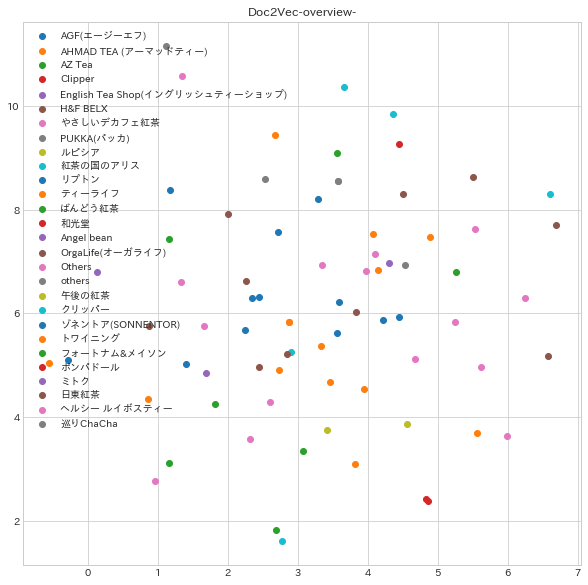

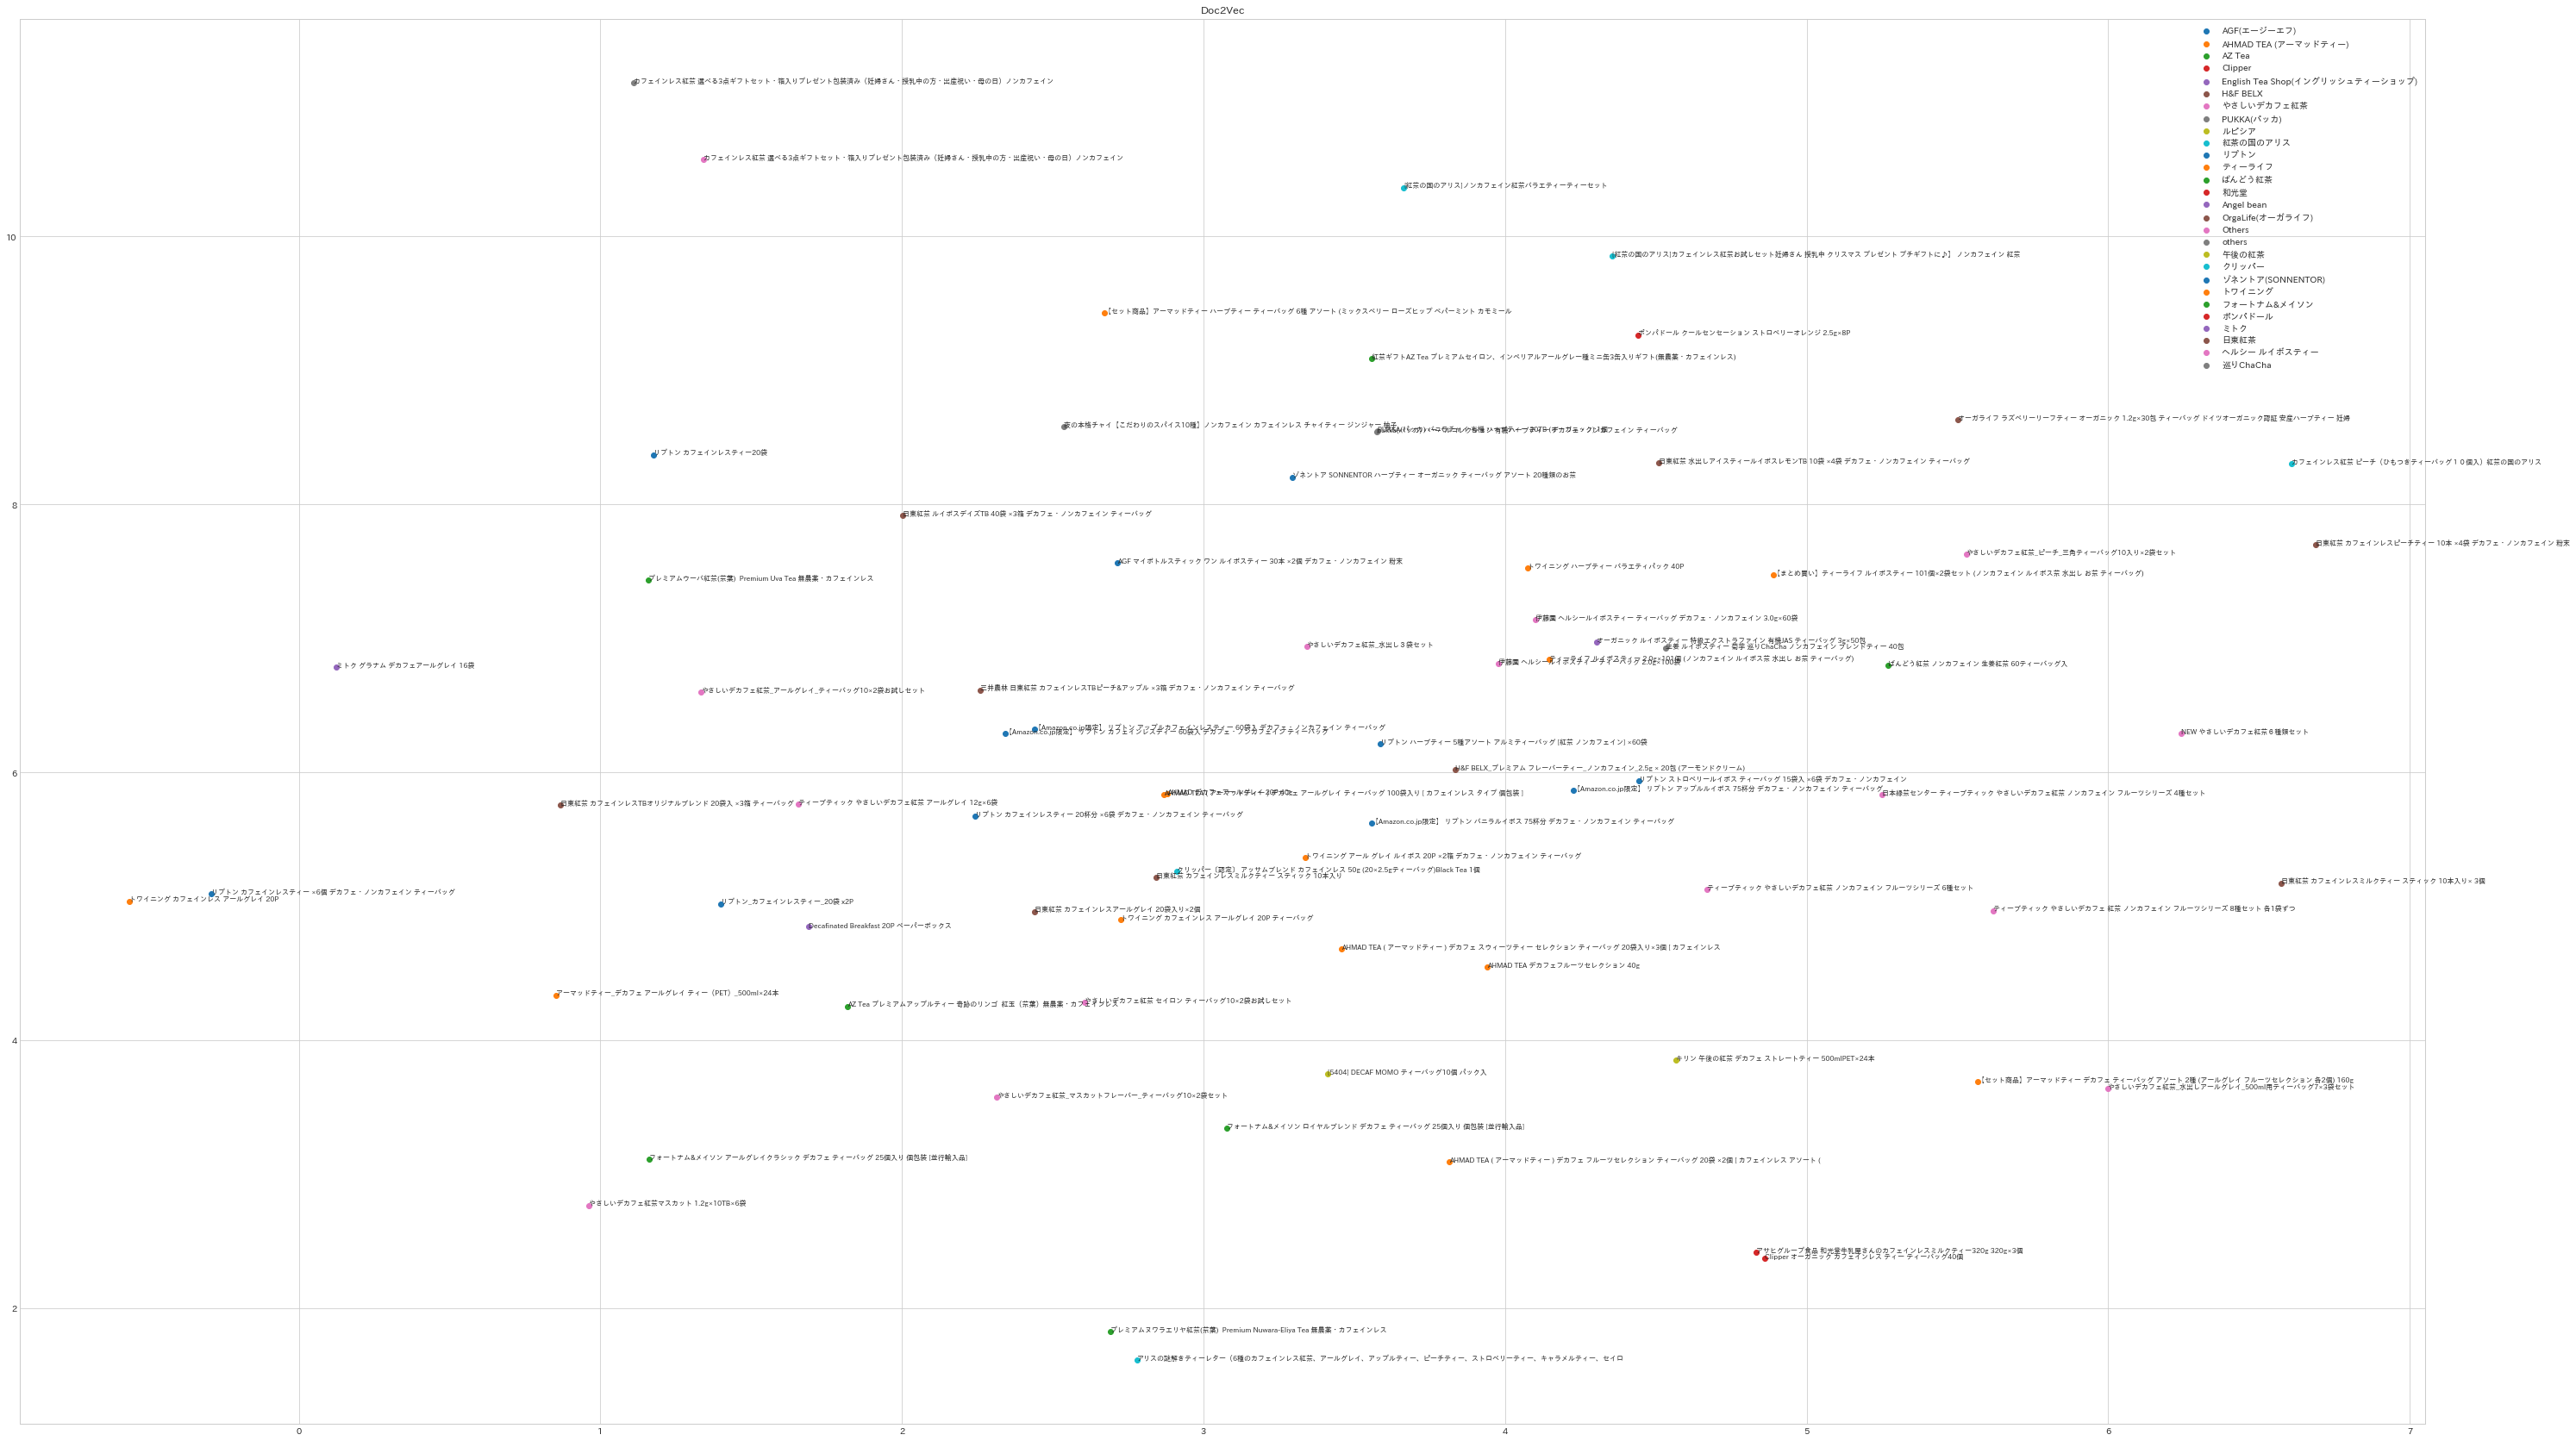

In [128]:
#Put in DataFrame
df_tsne_doc2vec = pd.DataFrame(tsne_doc2vec[:, 0],columns = ["x"])
df_tsne_doc2vec["y"] = pd.DataFrame(tsne_doc2vec[:, 1])
df_tsne_doc2vec["product_name"] = df_new_combined.product_name  
df_tsne_doc2vec["brand"] = df_new_combined.brand

pd.set_option('display.max_rows', 1000)
display(df_tsne_doc2vec.head(10))

##Visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.family'] = 'IPAexGothic'

#A: Overlook
fig_overview_doc2vec = plt.figure(figsize=(10.0, 10.0))
for f in df_tsne_doc2vec['brand'].unique():
    plt.scatter(df_tsne_doc2vec.loc[df_tsne_doc2vec.brand == f ,'x'], df_tsne_doc2vec.loc[df_tsne_doc2vec.brand == f ,'y'], label=f)

plt.legend()
plt.title("Doc2Vec-overview-")

#B: Detail
fig_detail_doc2vec = plt.figure(figsize=(50.0, 30.0))
for f in df_tsne_doc2vec['brand'].unique():
    plt.scatter(df_tsne_doc2vec.loc[df_tsne_doc2vec.brand == f ,'x'], df_tsne_doc2vec.loc[df_tsne_doc2vec.brand == f ,'y'], label=f)

for i, txt in enumerate(df_tsne_doc2vec["product_name"].values):
    plt.annotate(txt, (df_tsne_doc2vec["x"].values[i], df_tsne_doc2vec["y"].values[i]), fontsize=8)
    
plt.legend()
plt.title("Doc2Vec")

plt.show()